('0', 0)


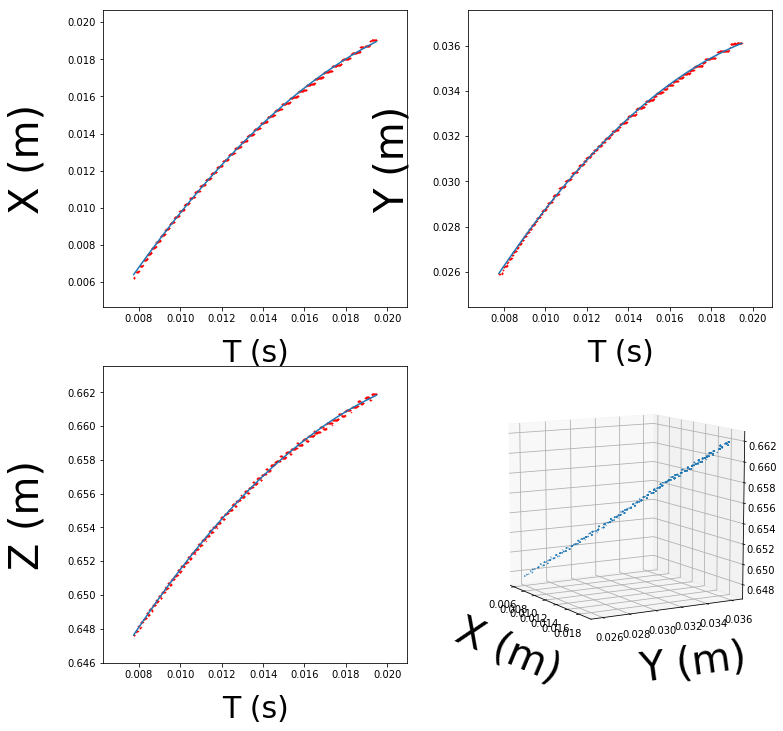

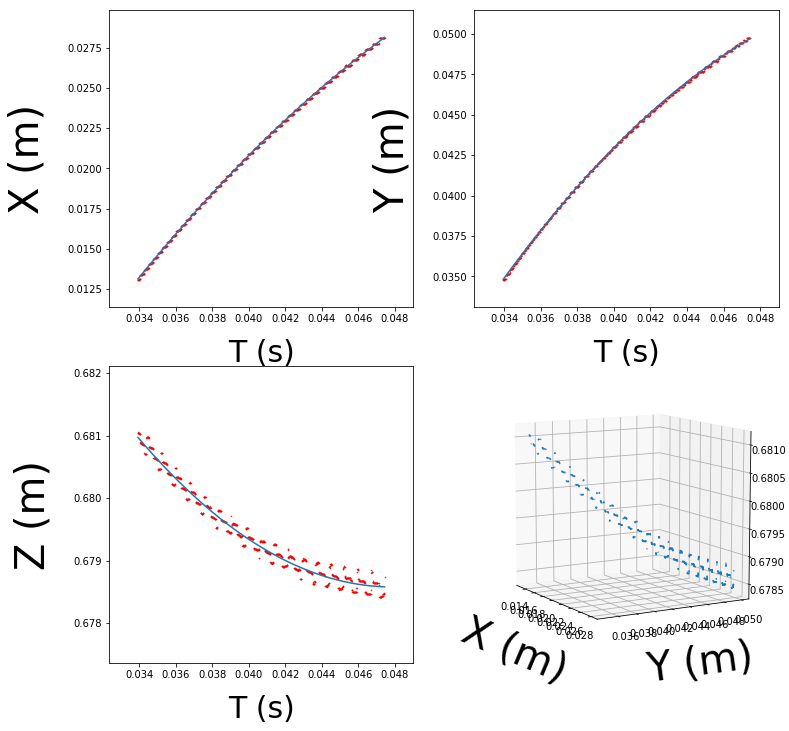

('0', 502)


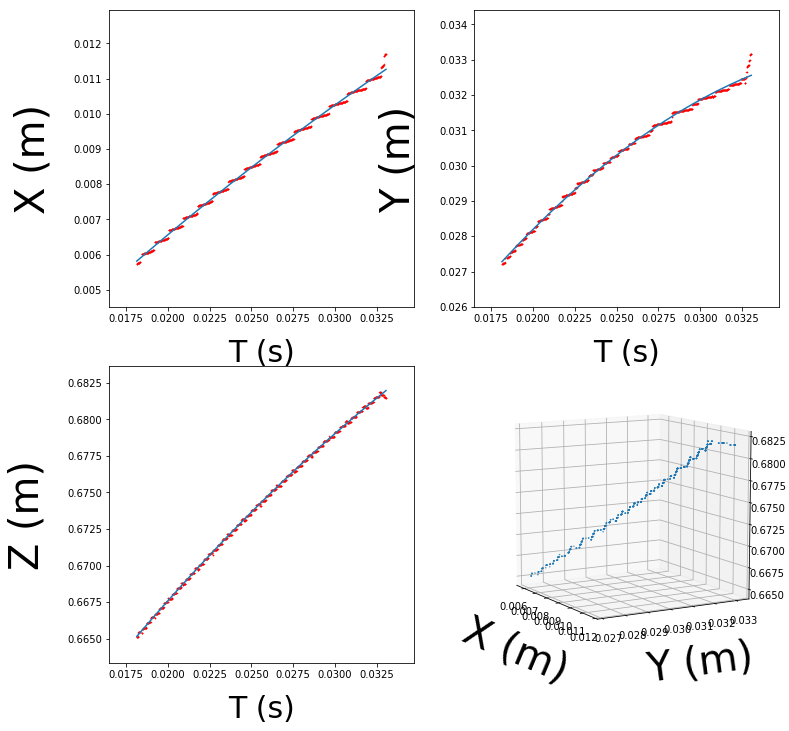

('1', 73)


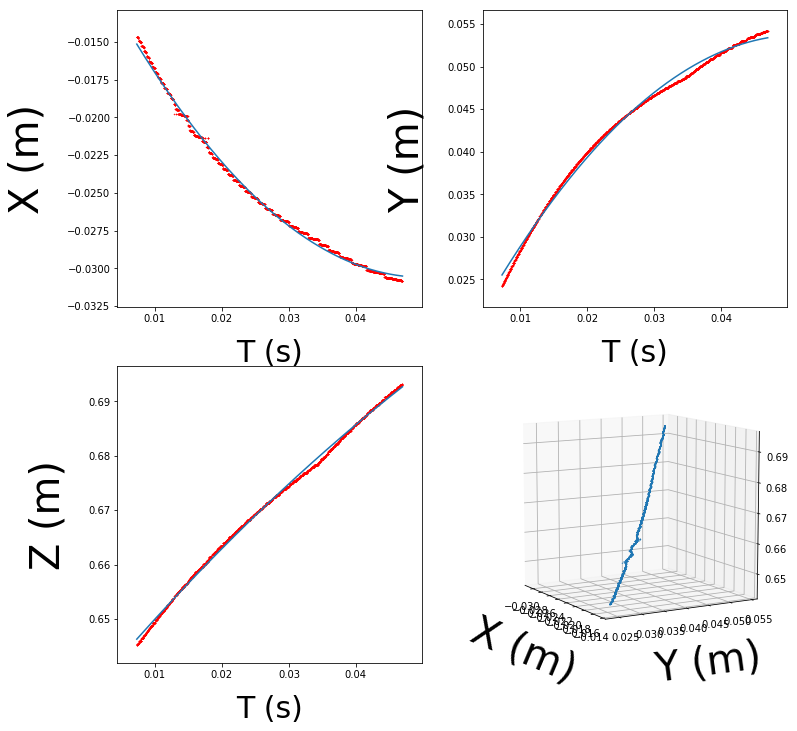

('1009', 917)


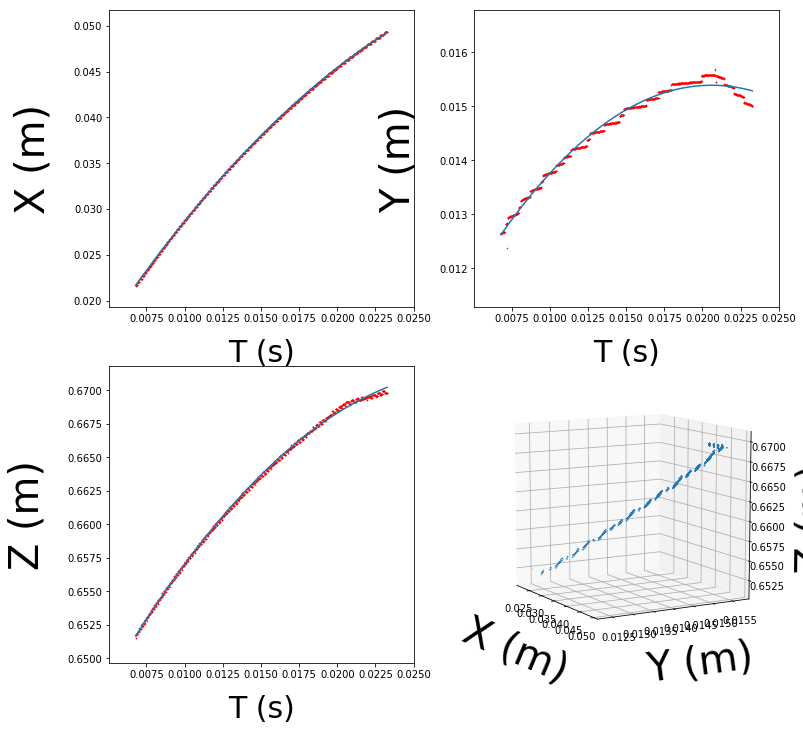

('1051', 913)


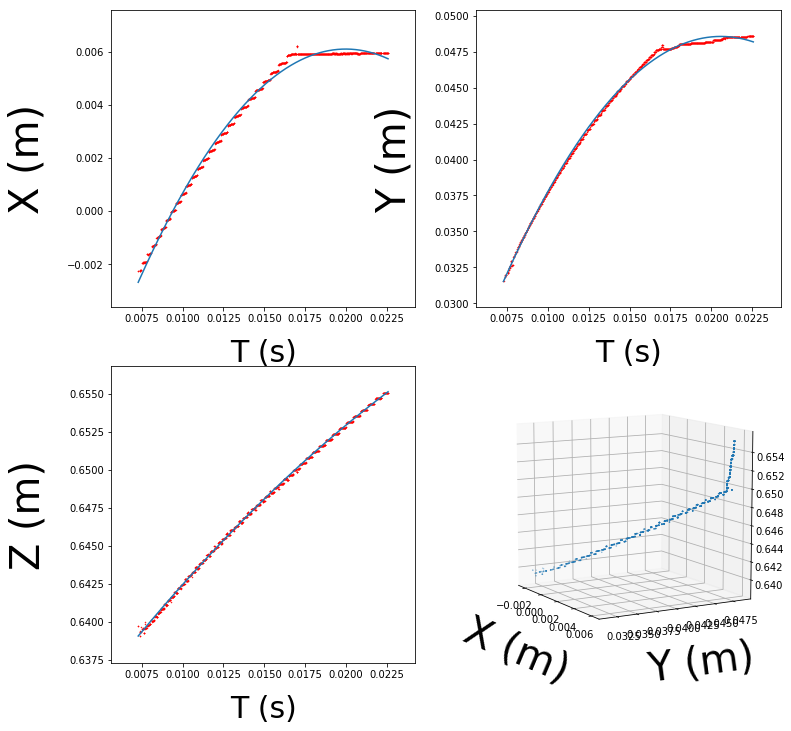

('1101', 1007)


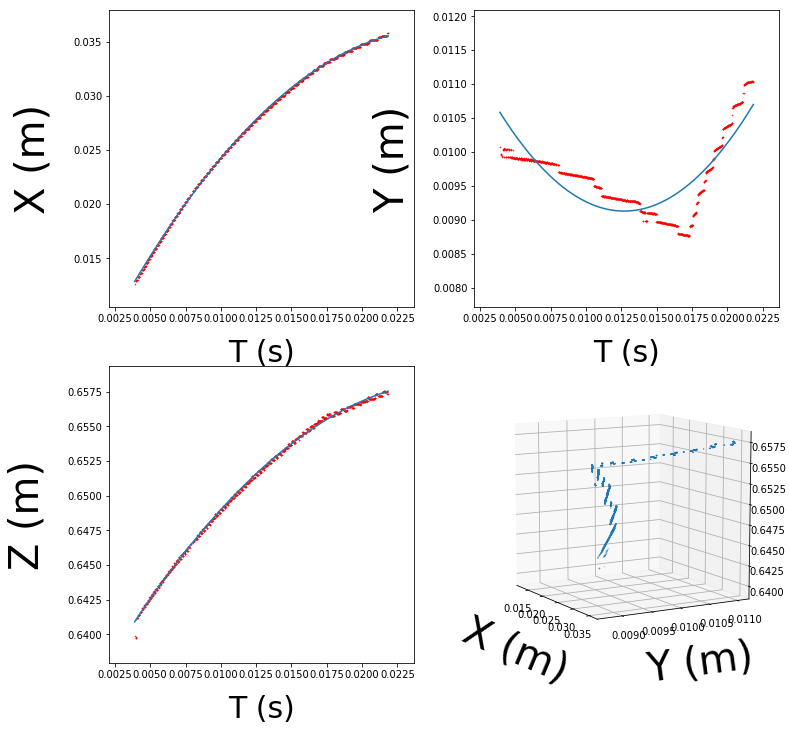

('1112', 995)


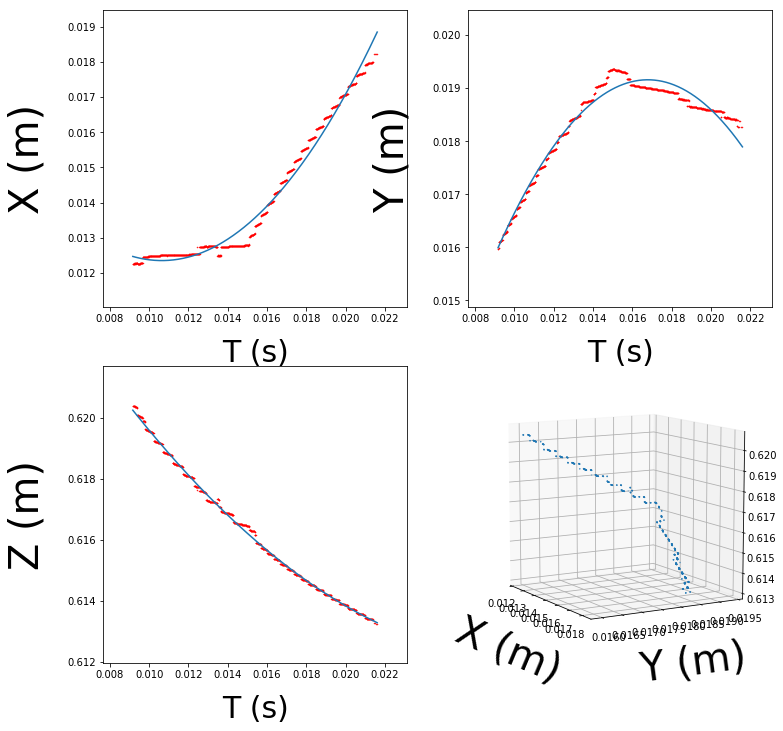

('1112', 1653)


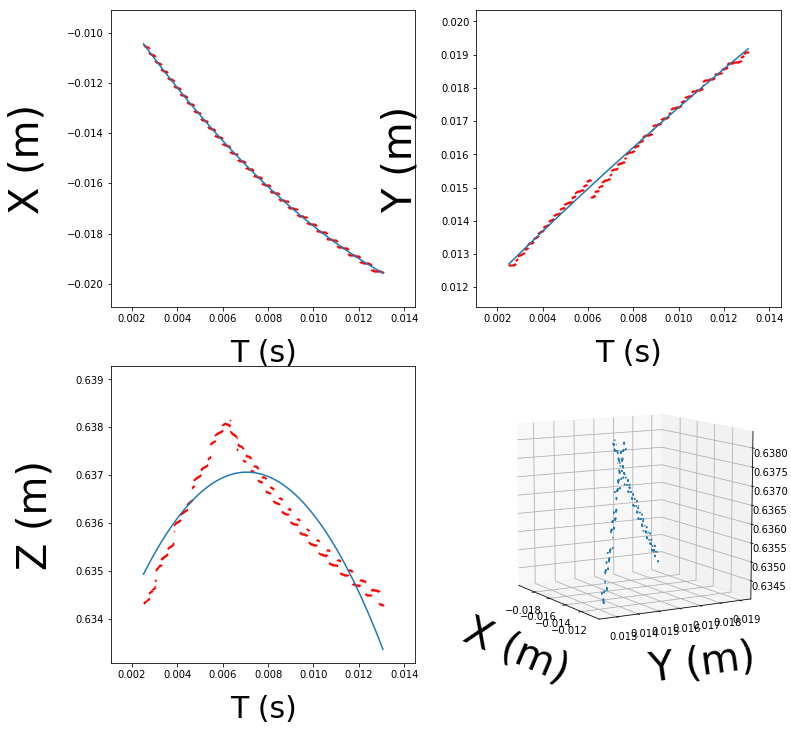

('1152', 620)


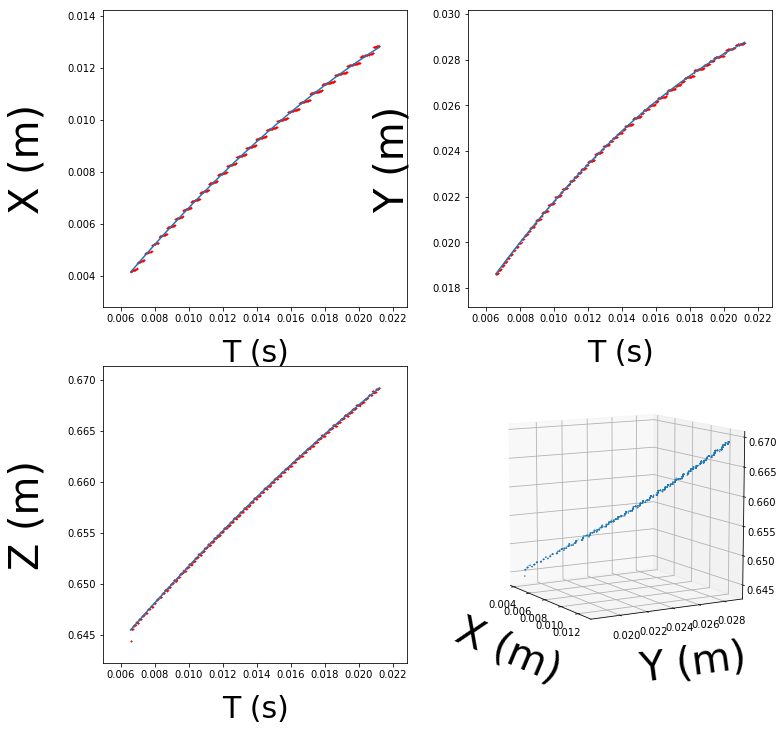

('12', 917)


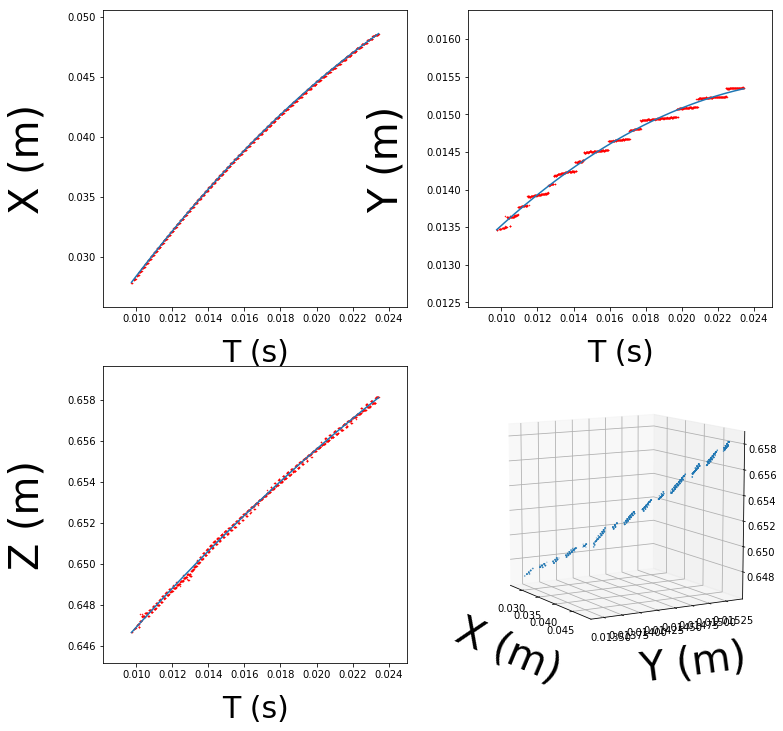

('1207', 1049)


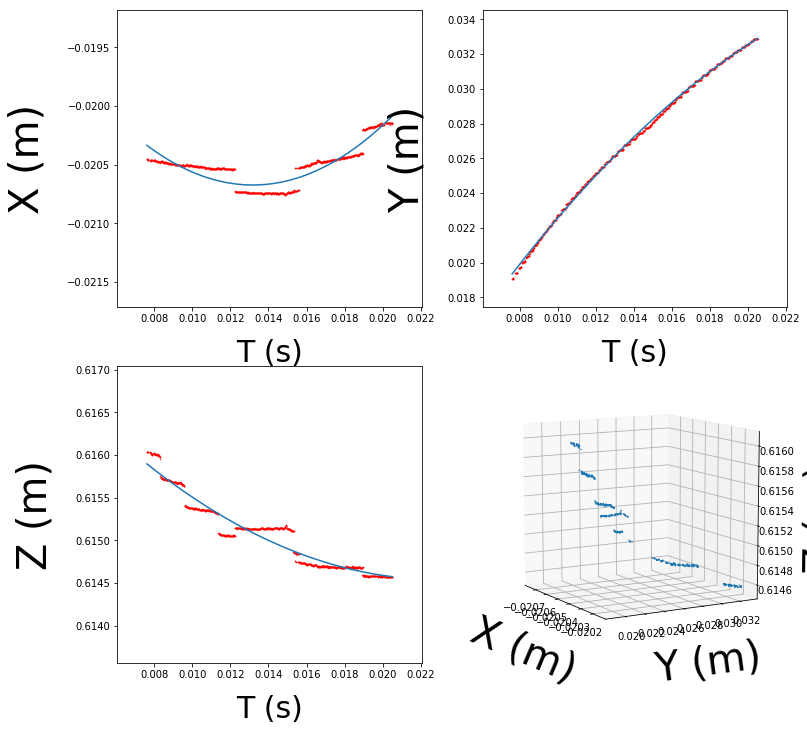

('1216', 358)


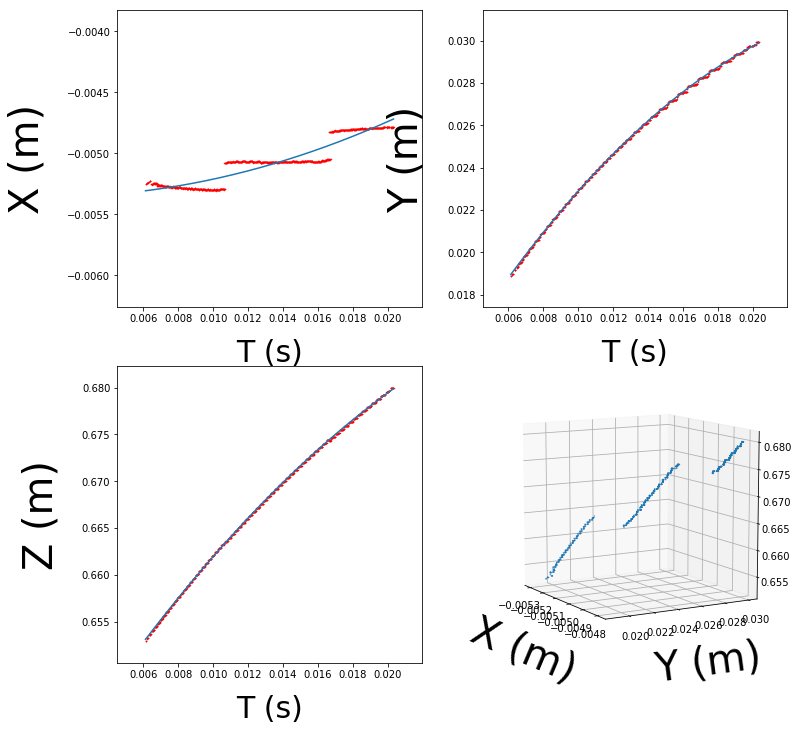

('1216', 620)


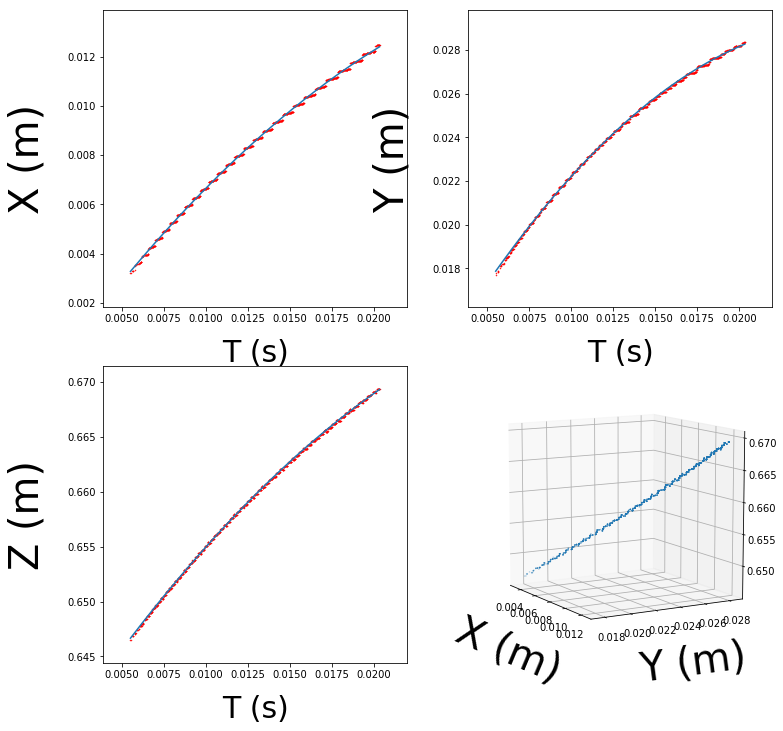

('1233', 1109)


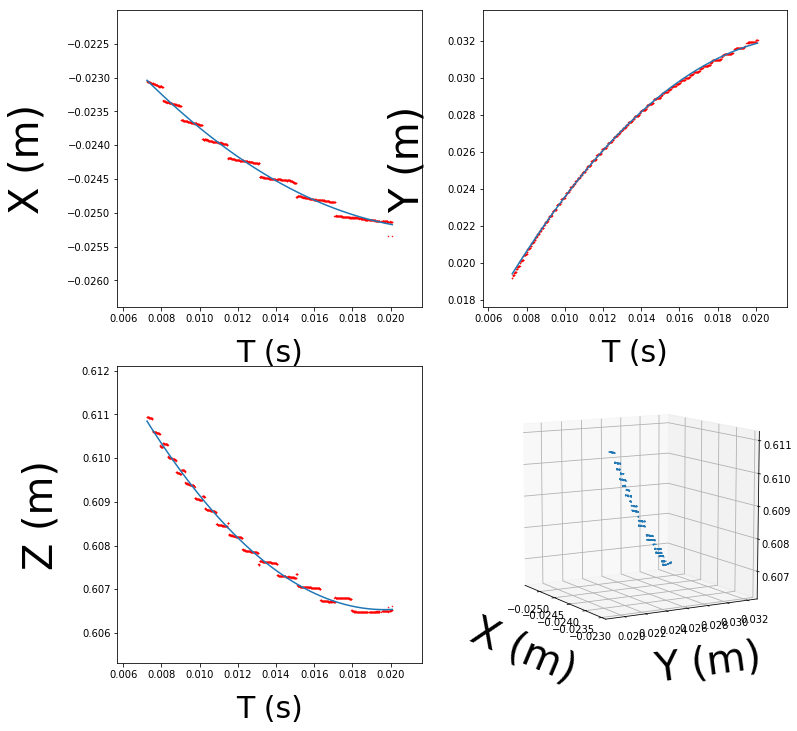

('1257', 1212)


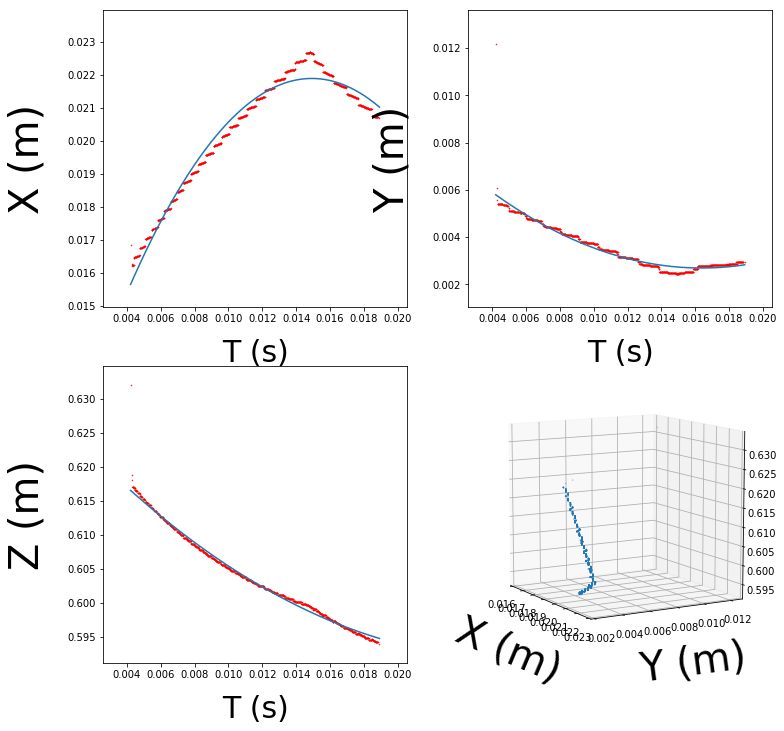

('1264', 1152)


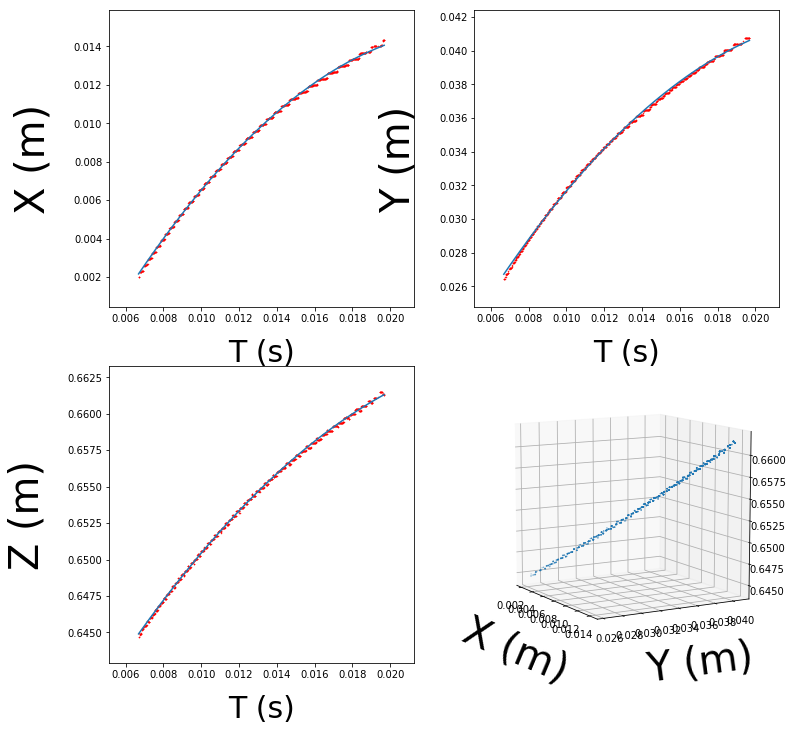

('1272', 1358)


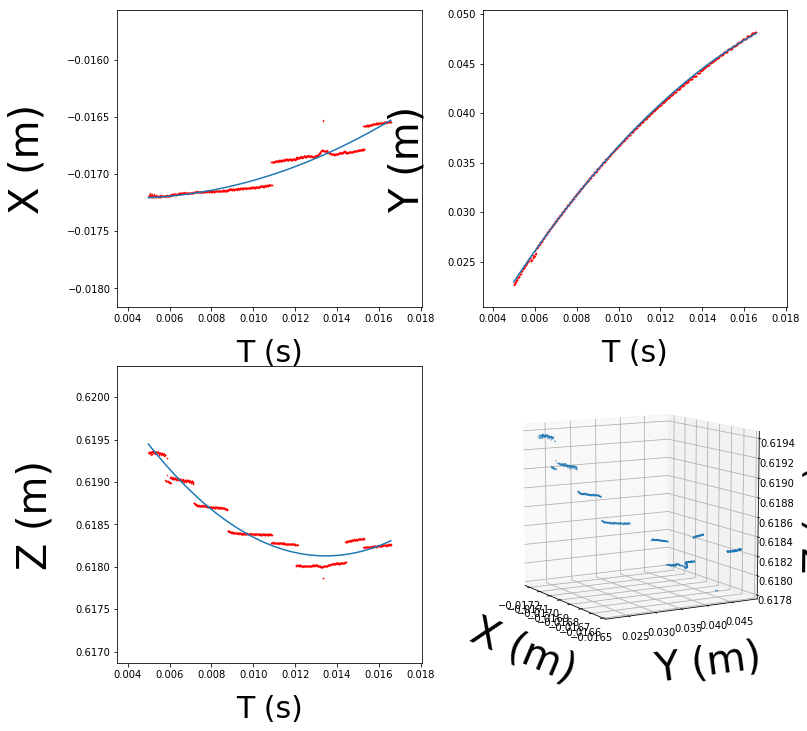

('1278', 1133)


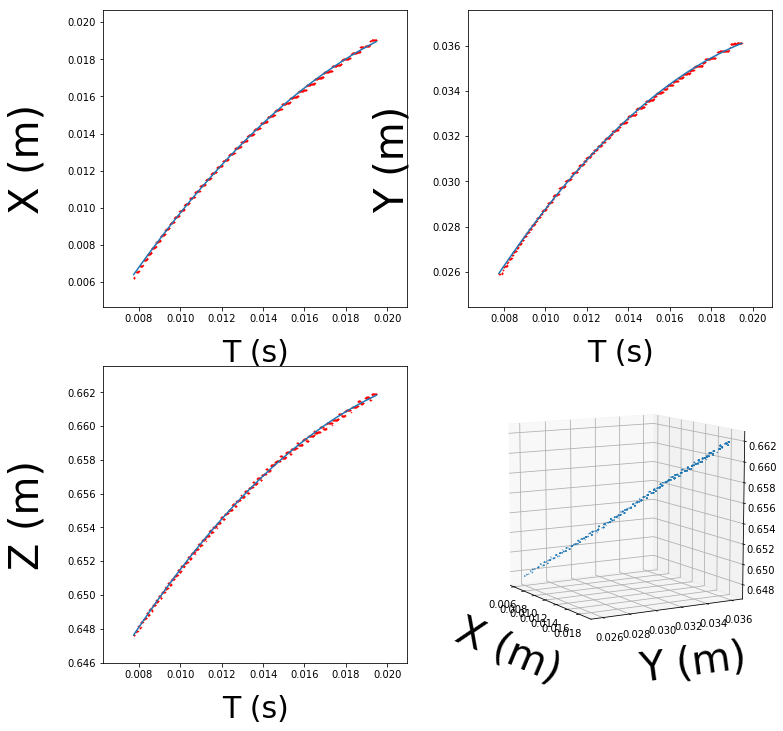

('128', 241)


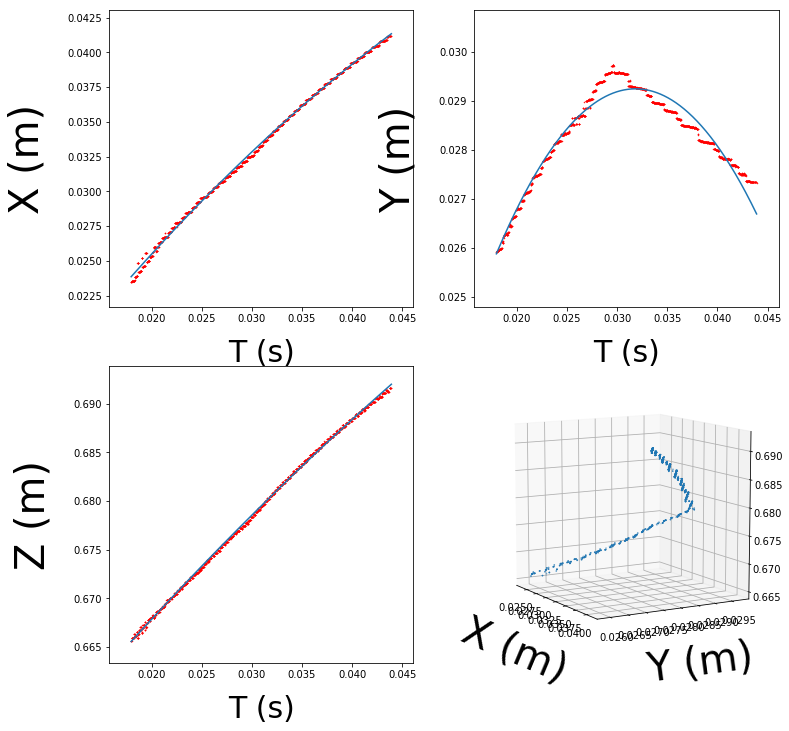

('1296', 1188)


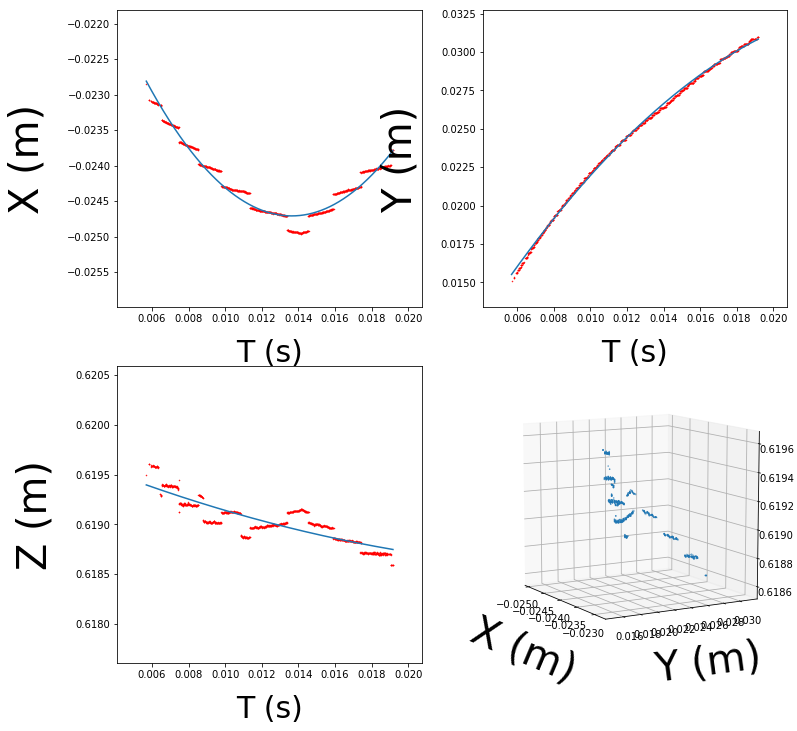

('1308', 1308)


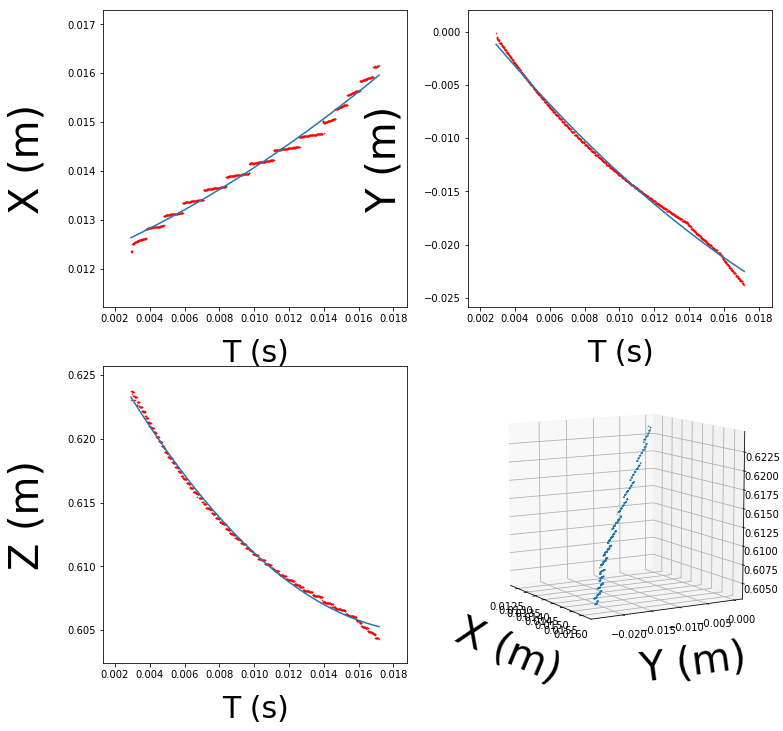

('1308', 1441)


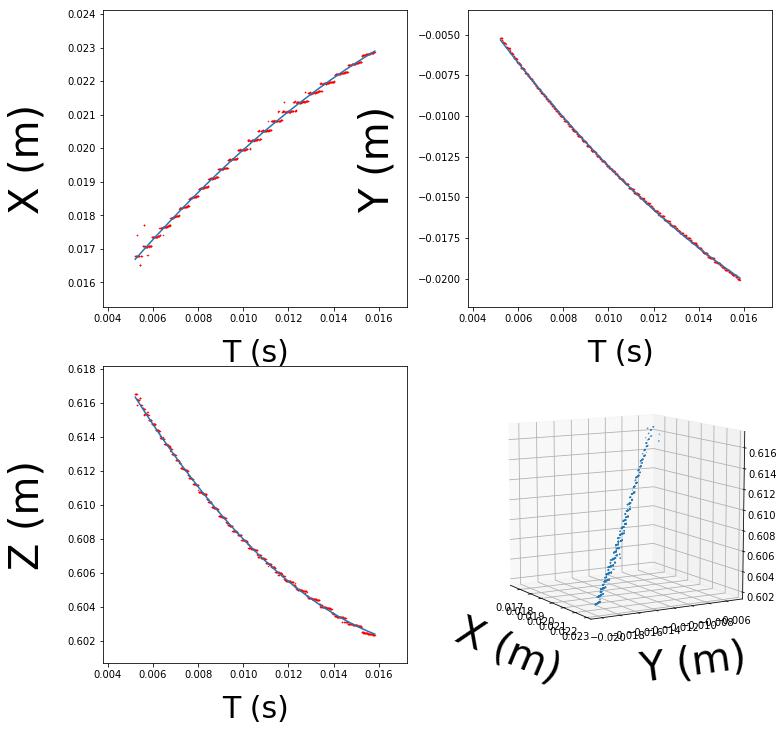

('1319', 1188)


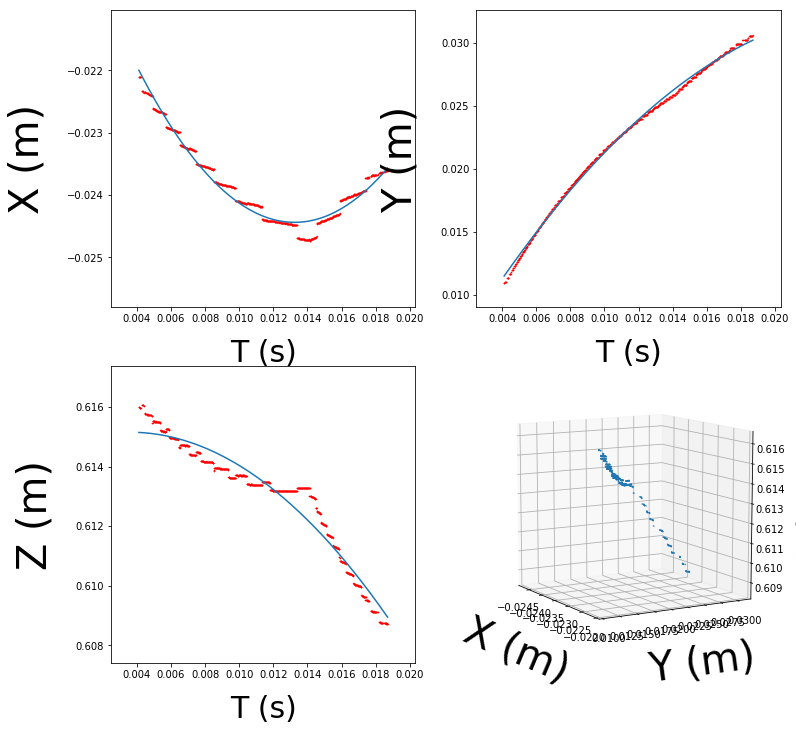

('1337', 1297)


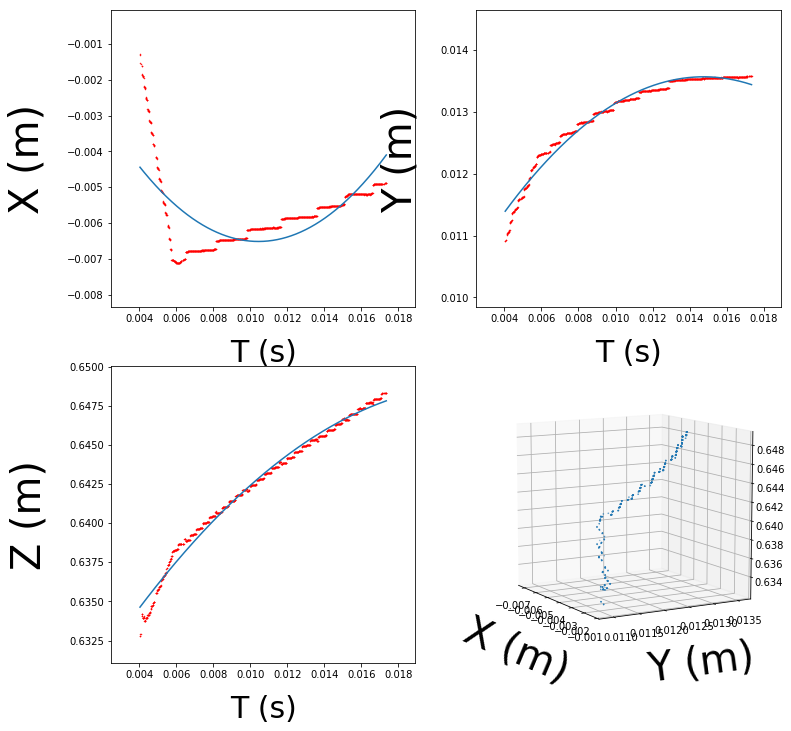

('1342', 1242)


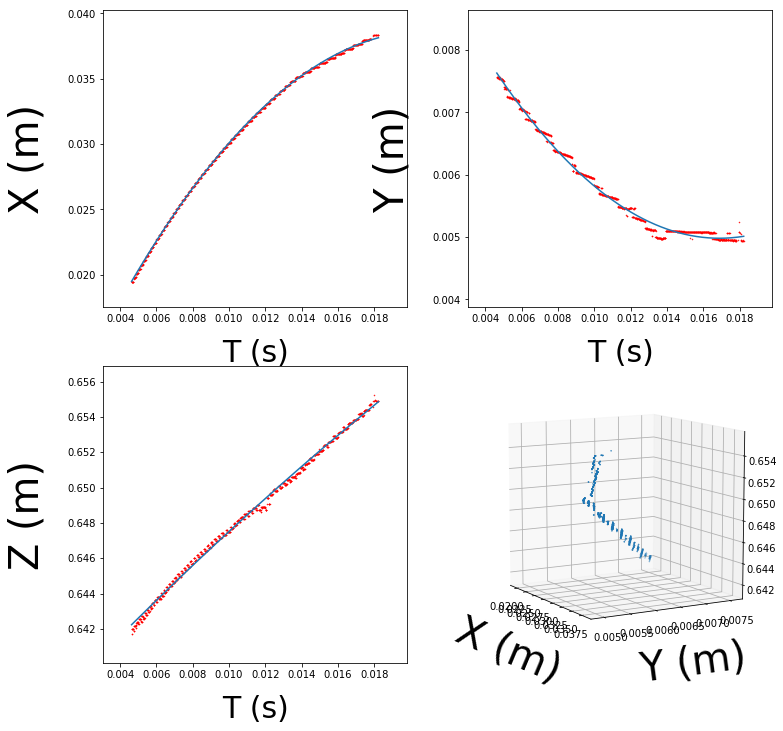

('1344', 1244)


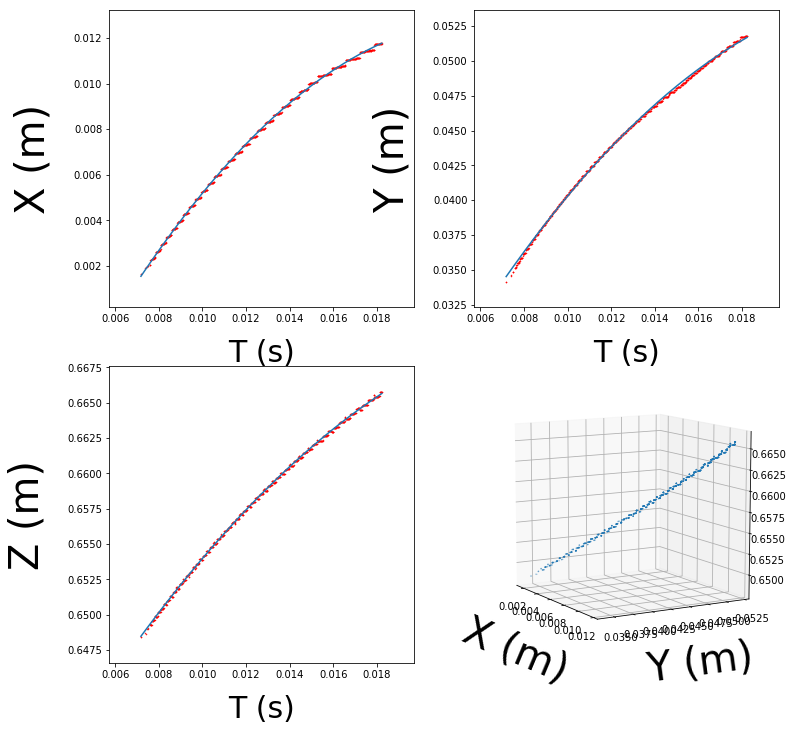

('1417', 1360)


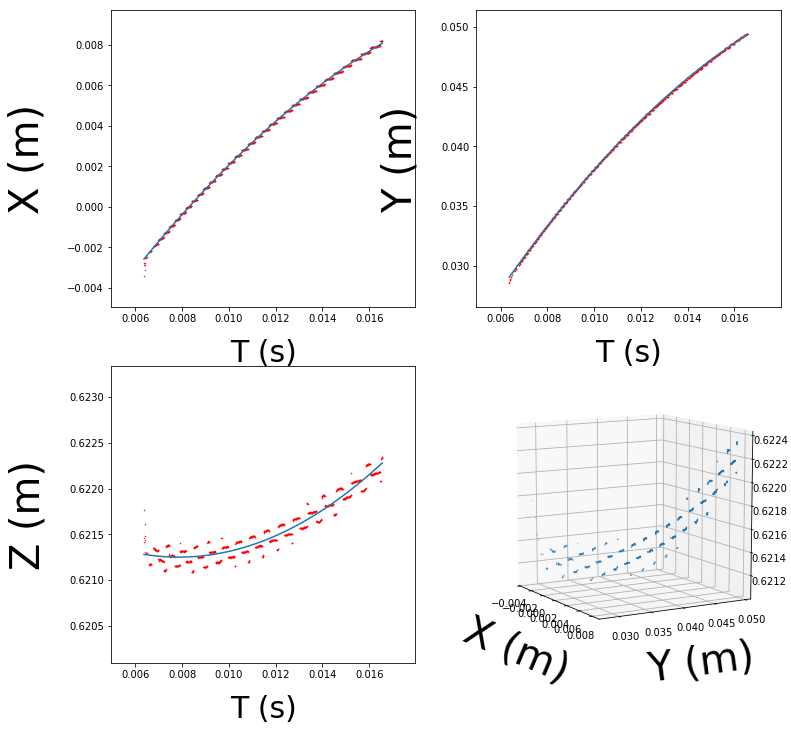

('1423', 1313)


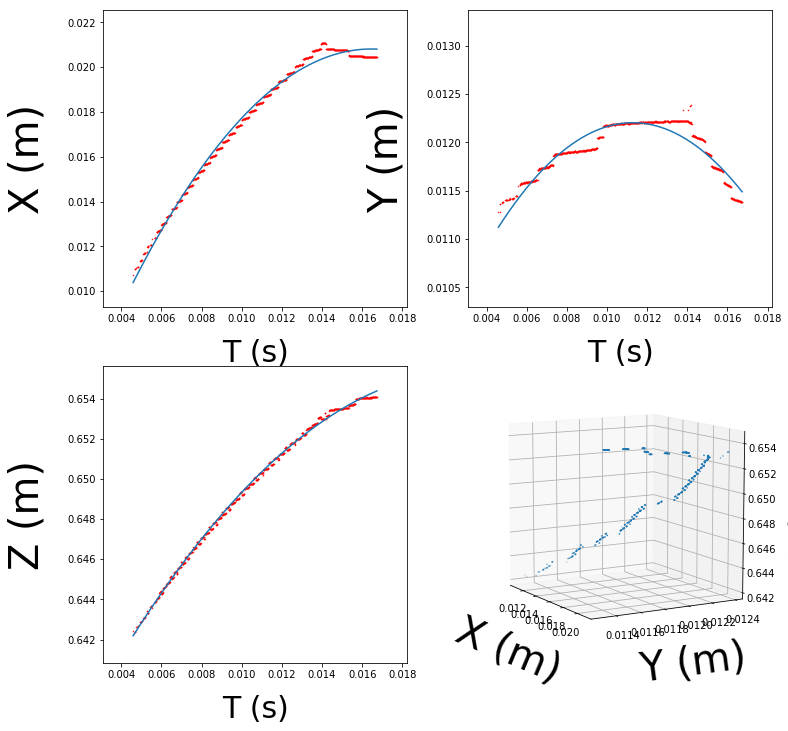

('1424', 1405)


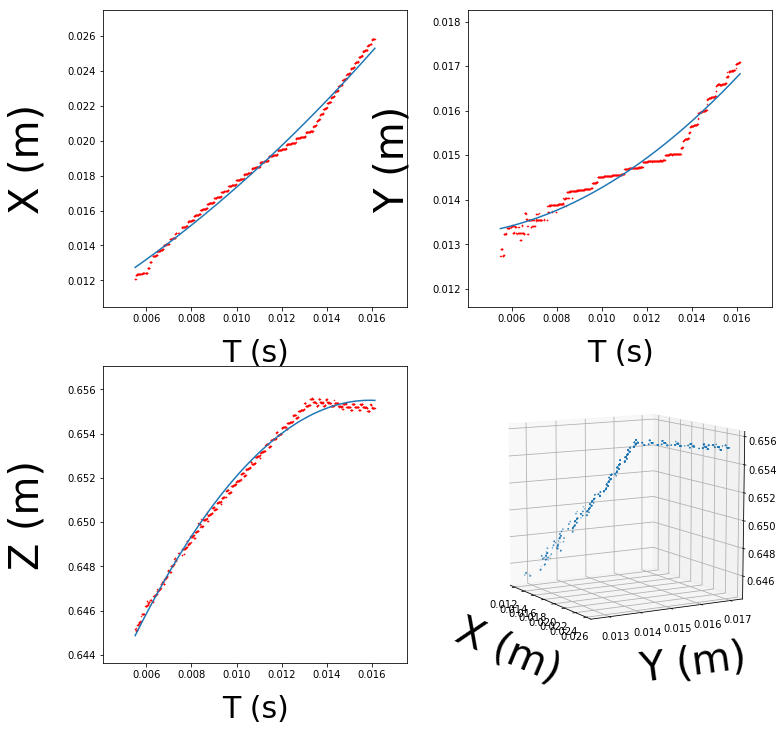

('1462', 1301)


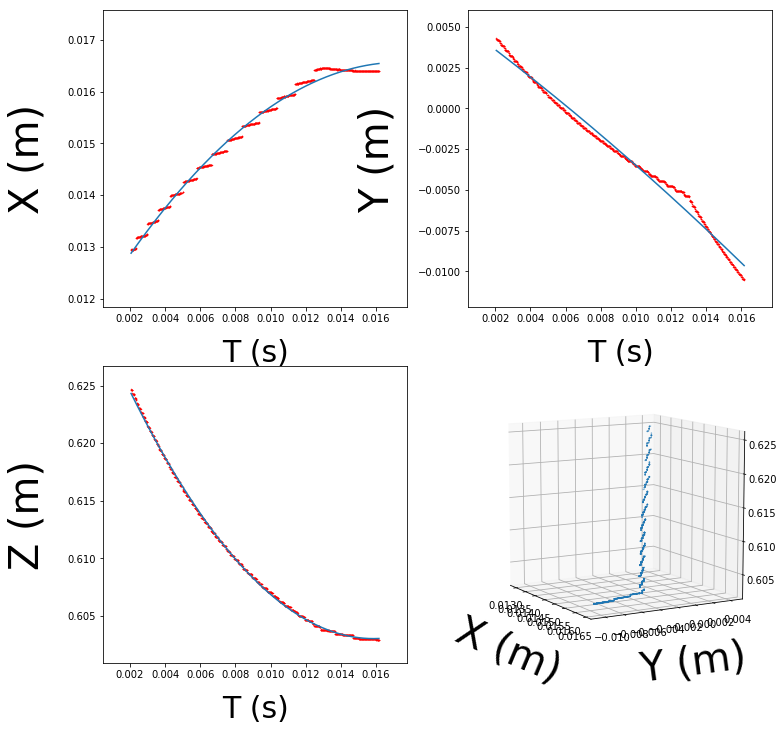

('1553', 1393)


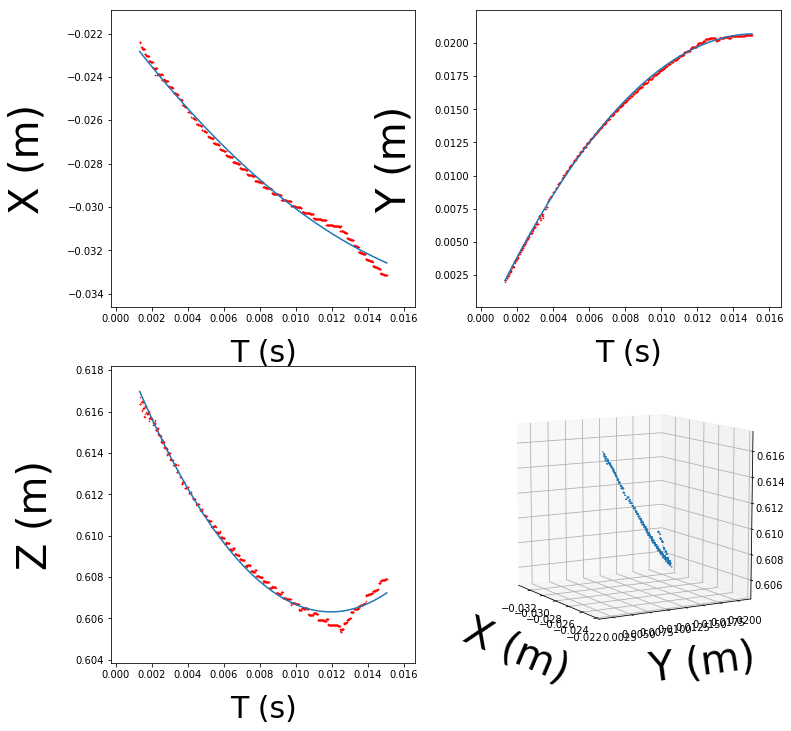

('1558', 1349)


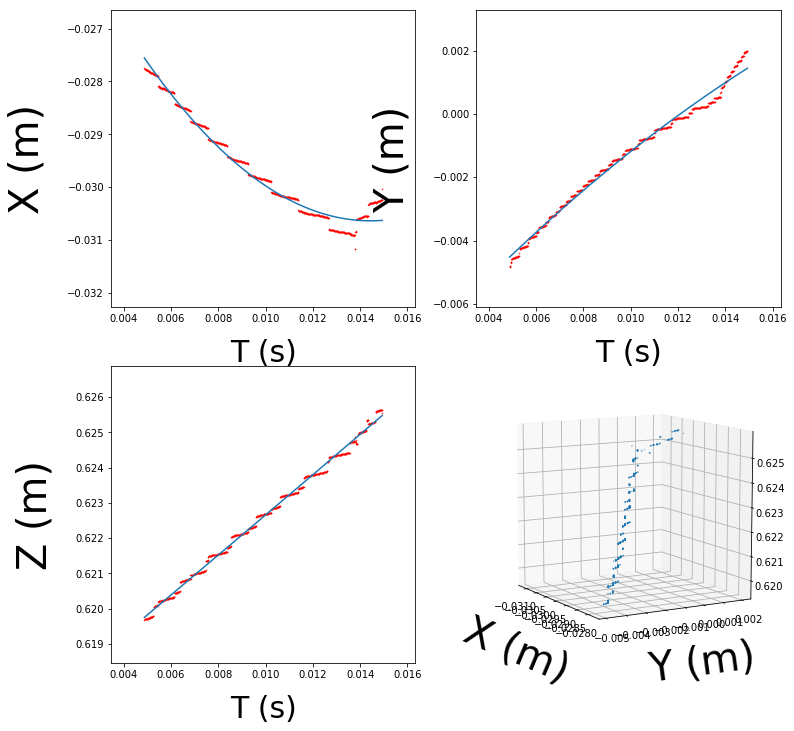

('1571', 1454)


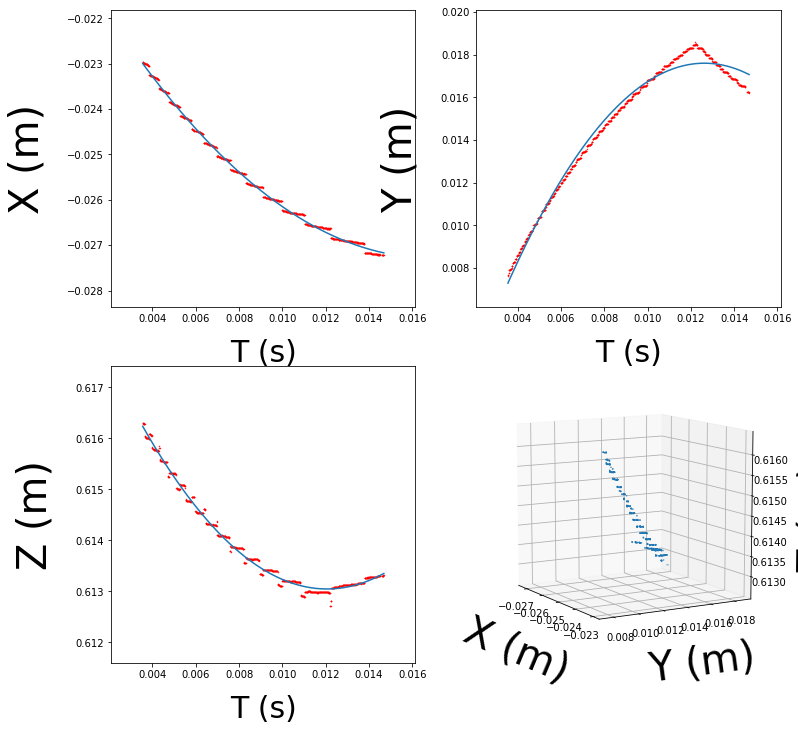

('1632', 1359)


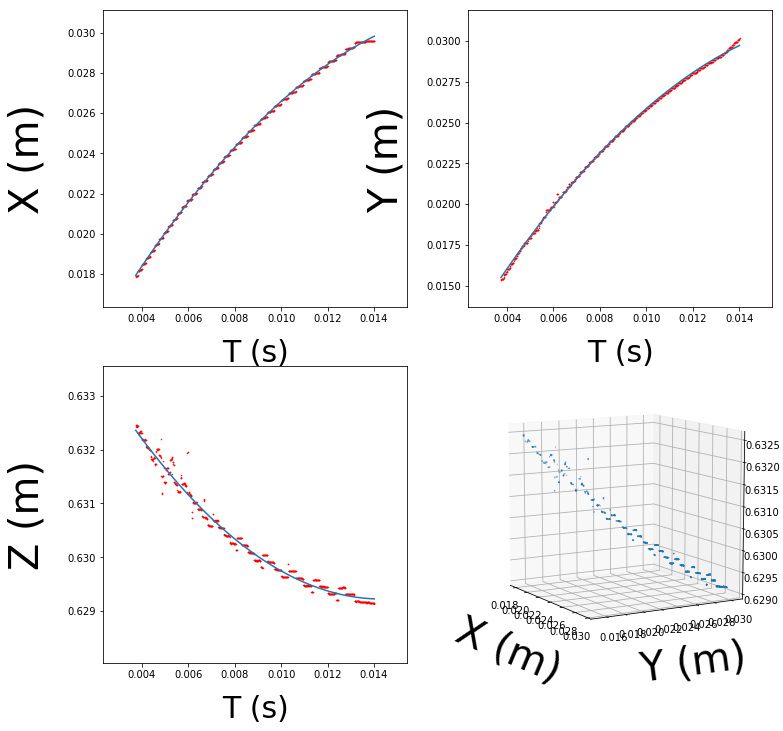

('1669', 1637)


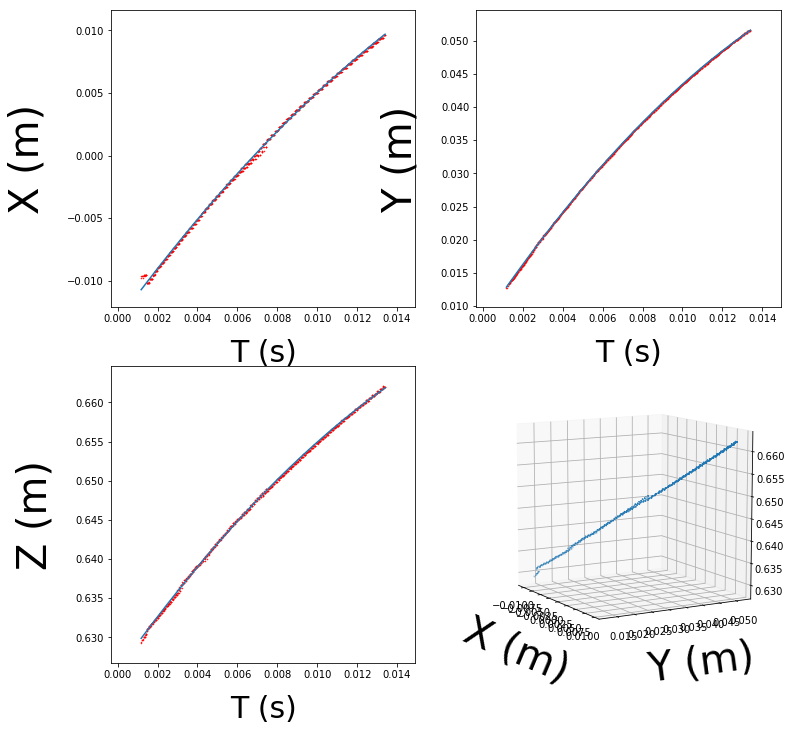

('176', 446)


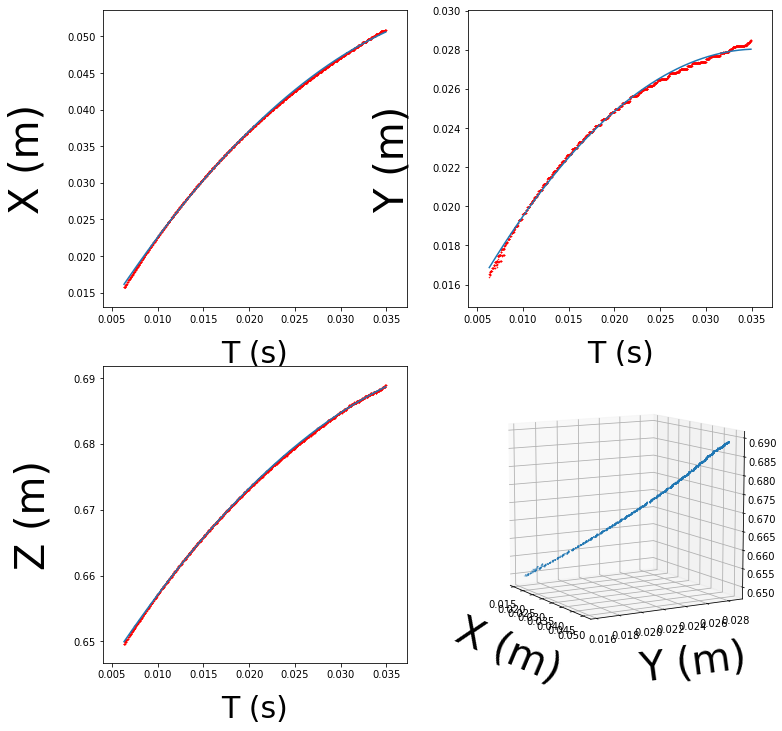

('224', 318)


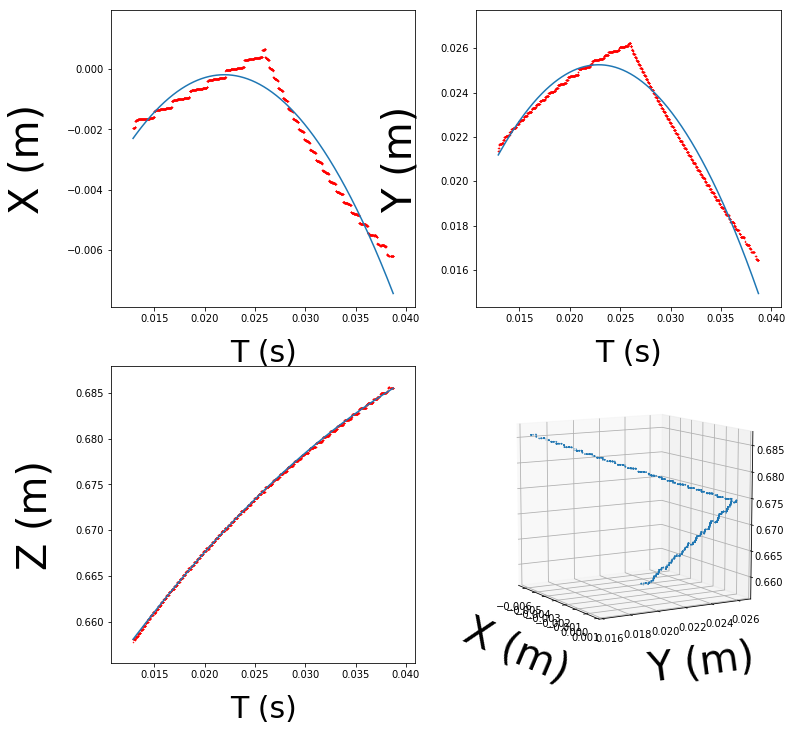

('243', 339)


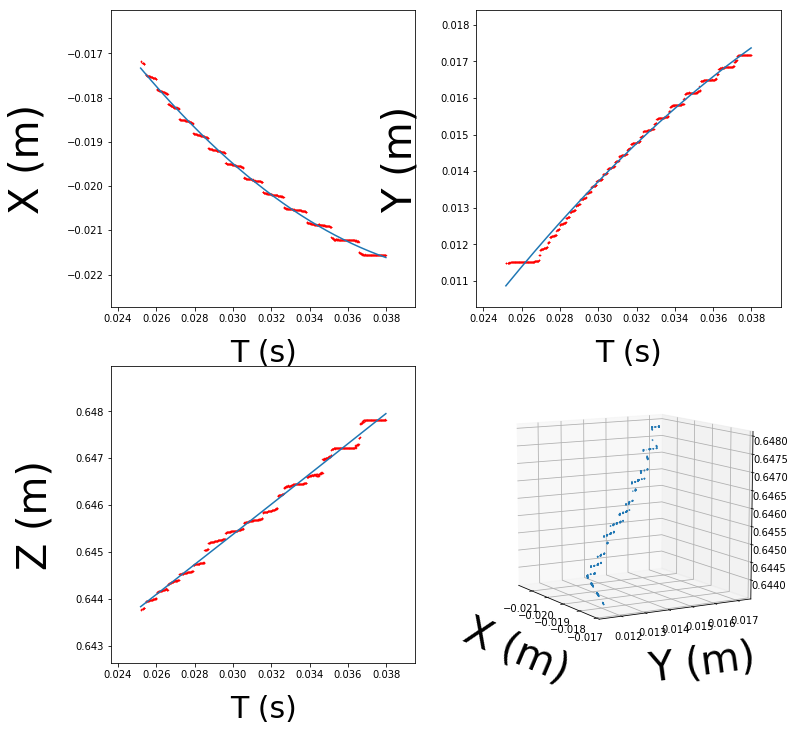

('254', 344)


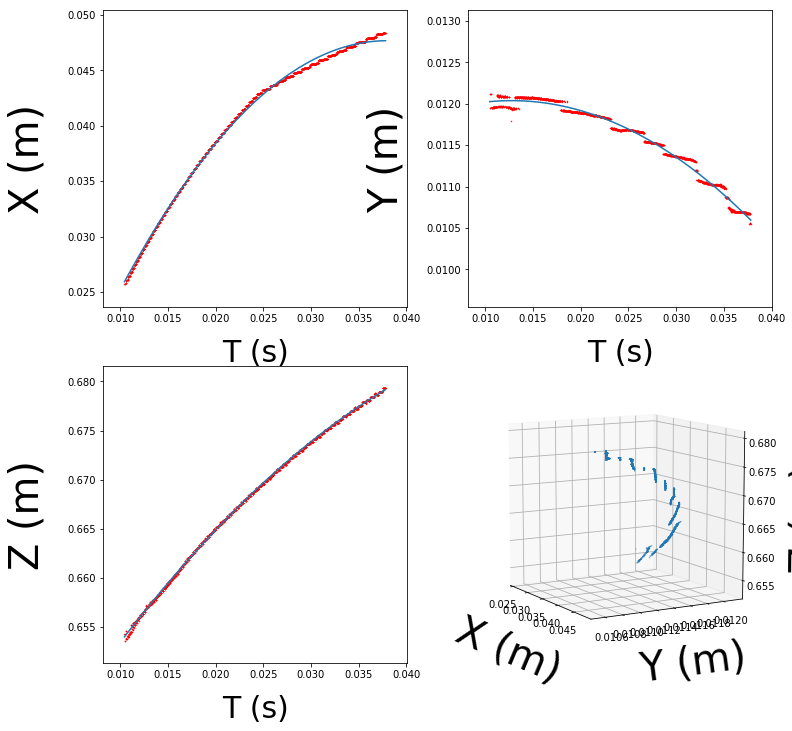

('3', 1)


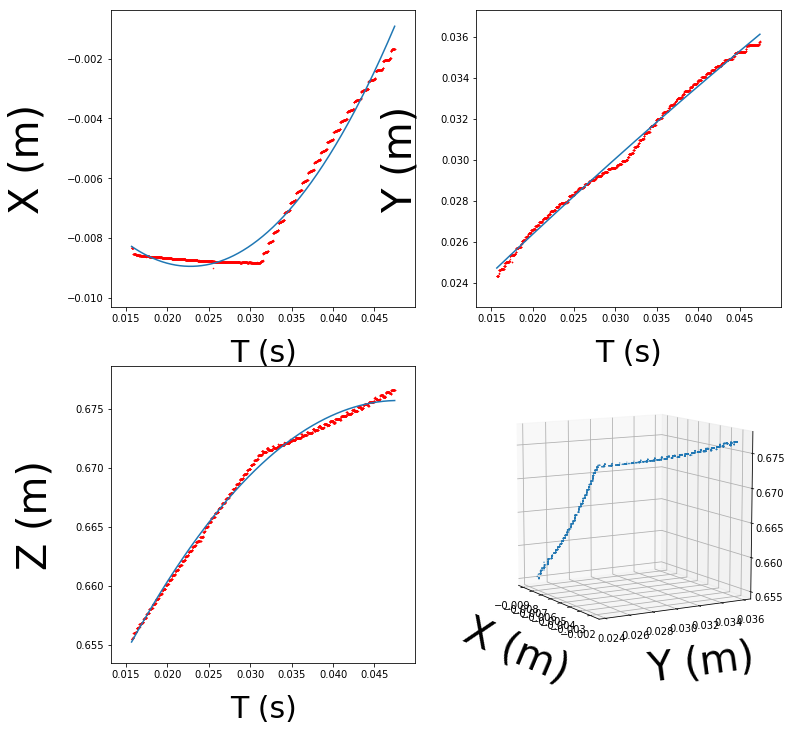

('307', 327)


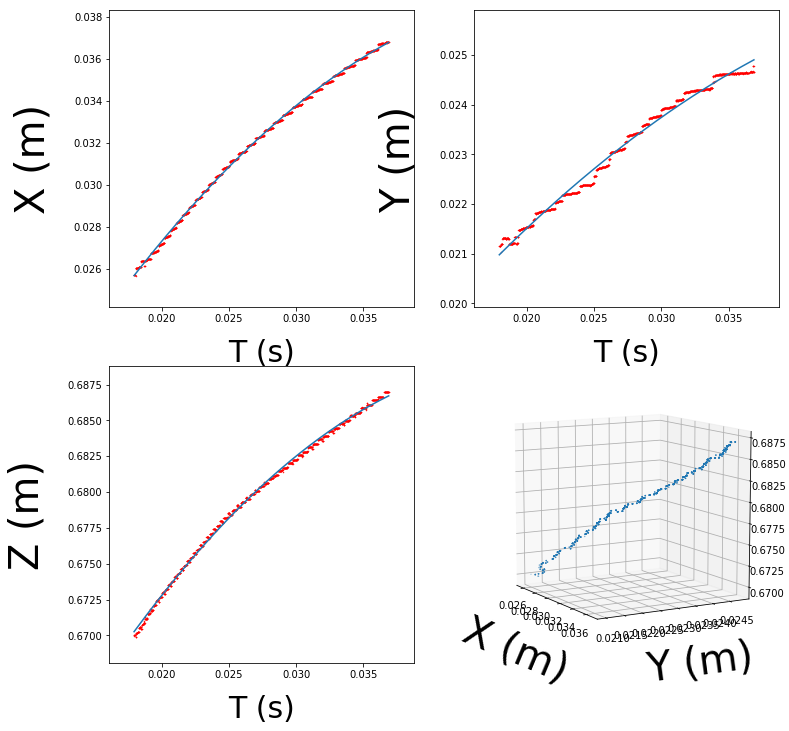

('339', 358)


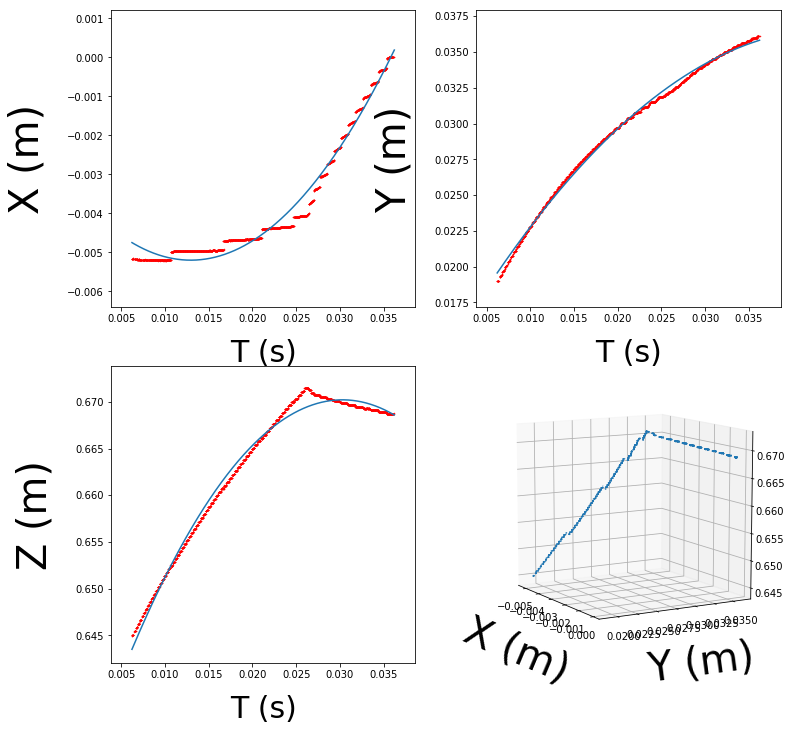

('350', 1619)


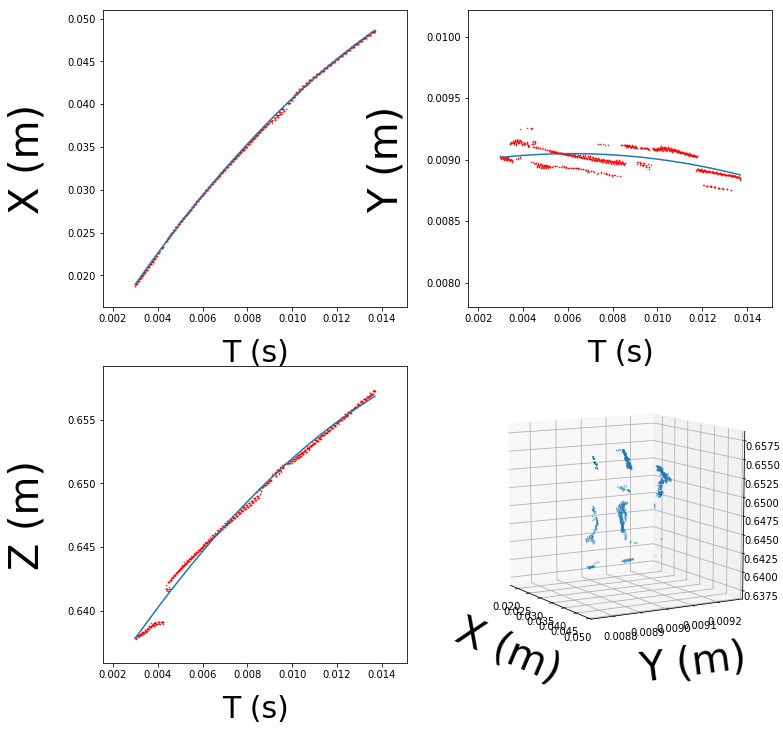

('367', 222)


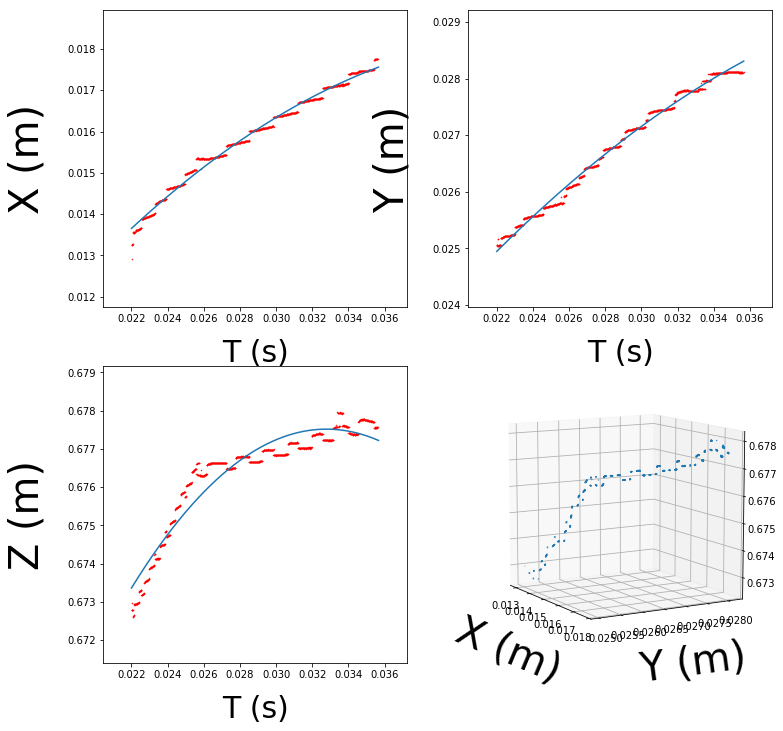

('379', 292)


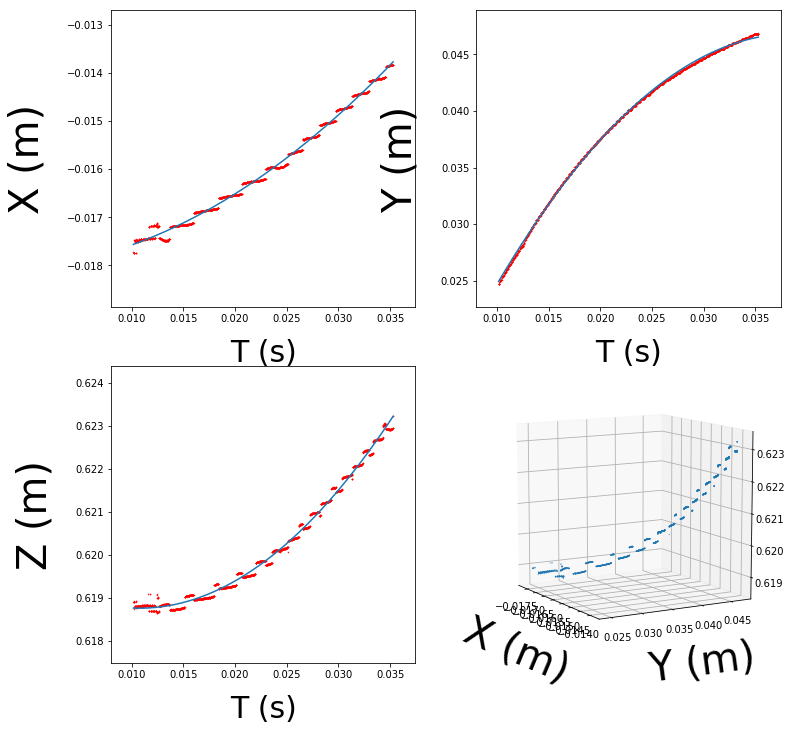

('395', 259)


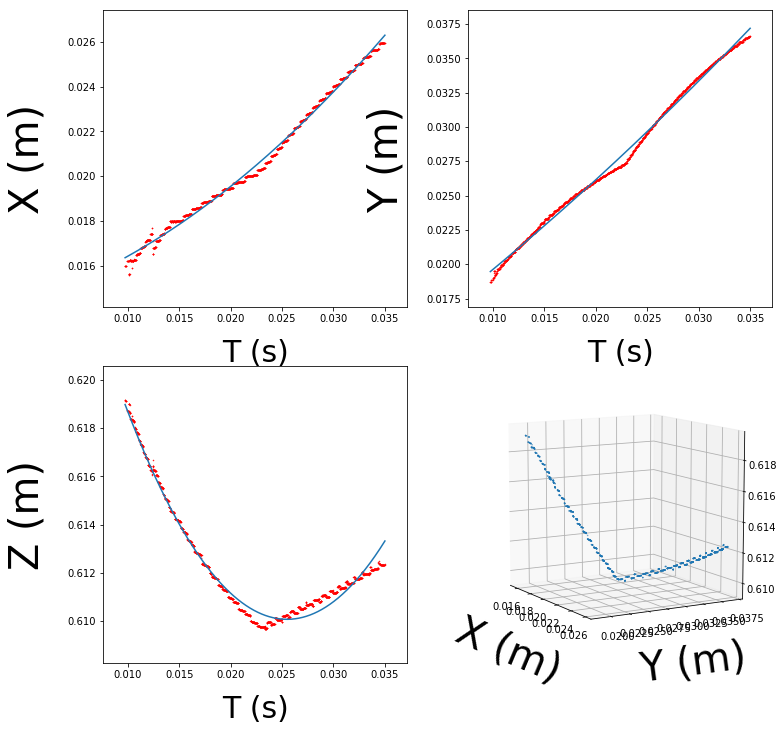

('443', 288)


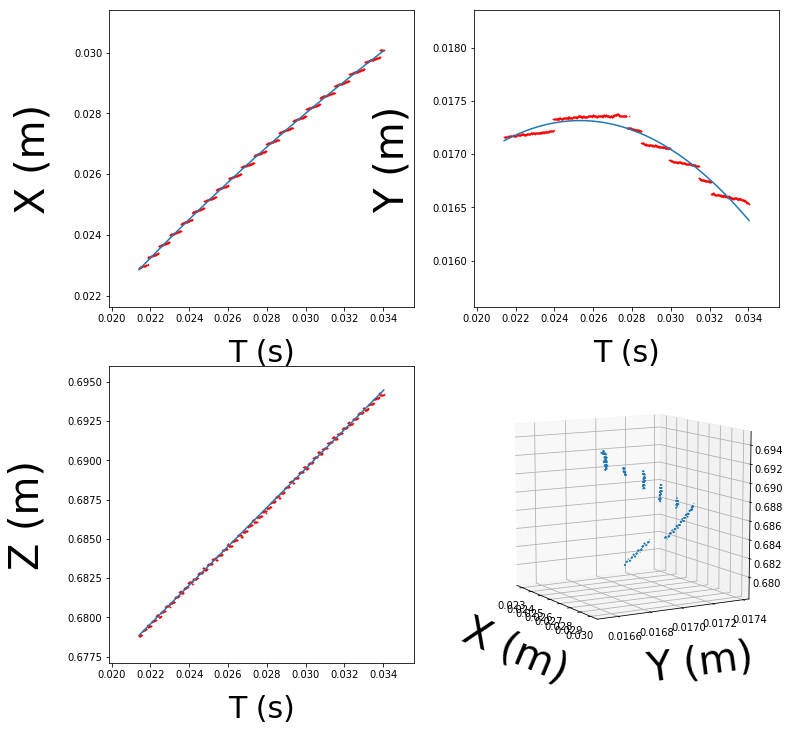

('453', 469)


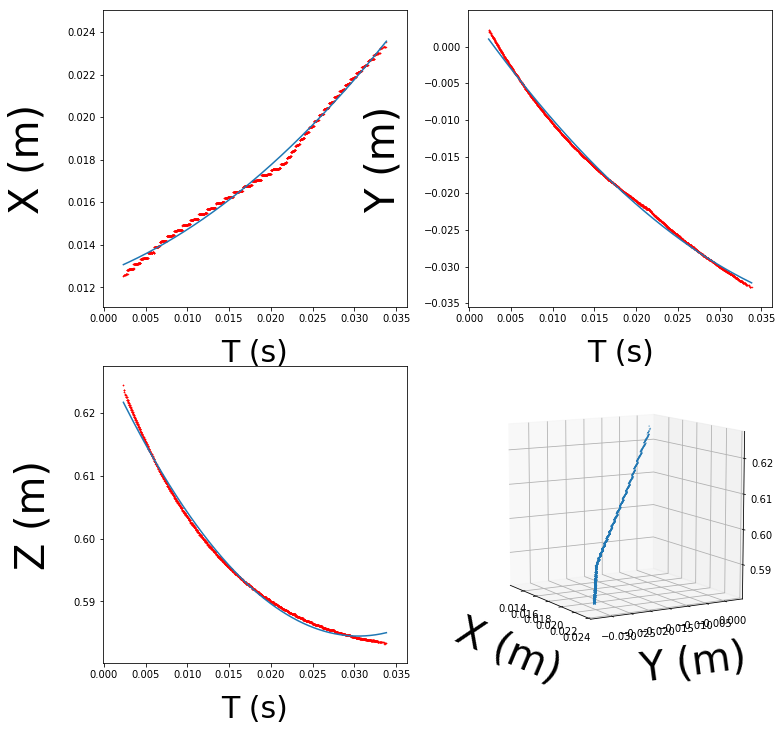

('477', 327)


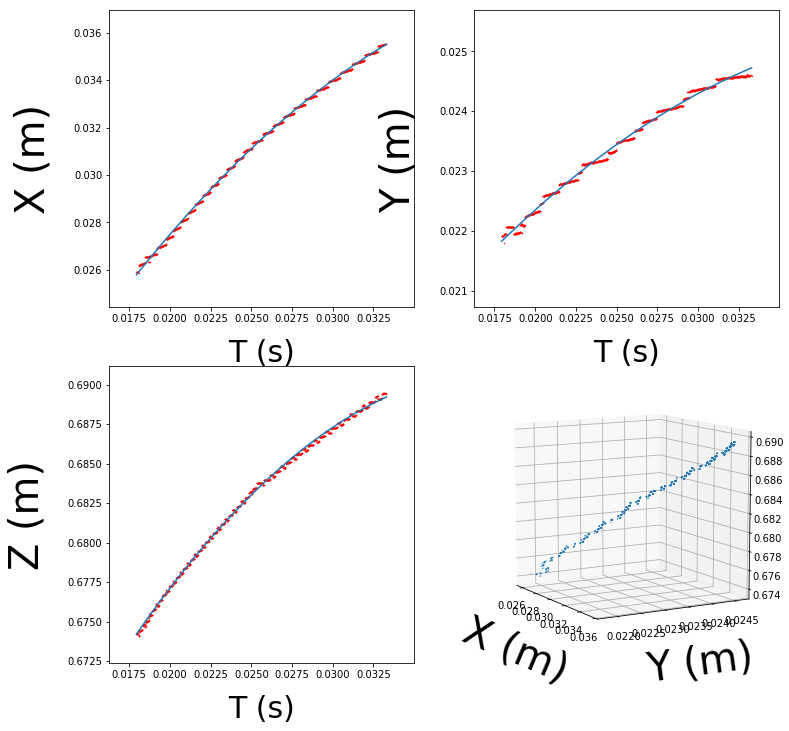

('477', 388)


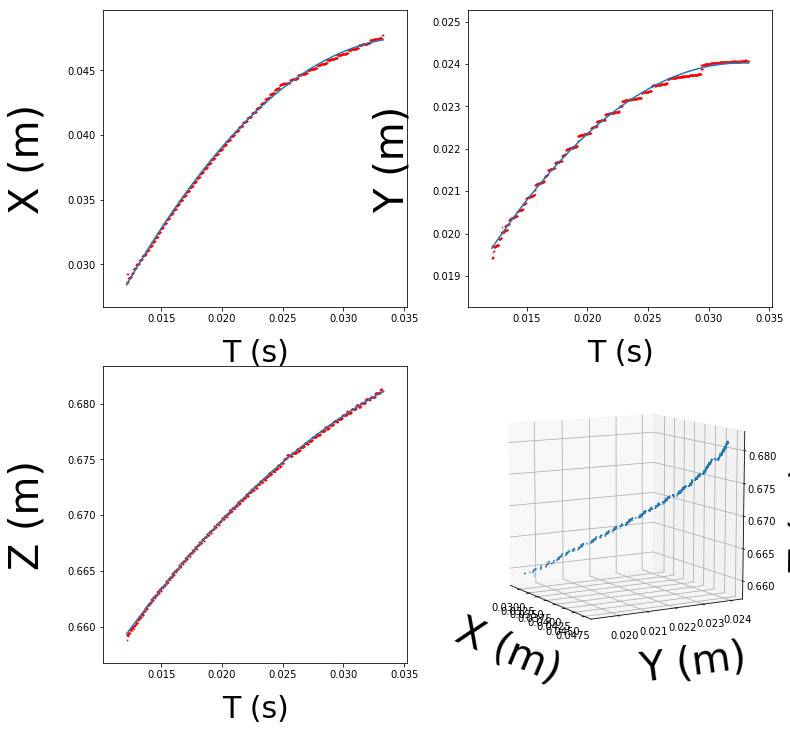

('584', 619)


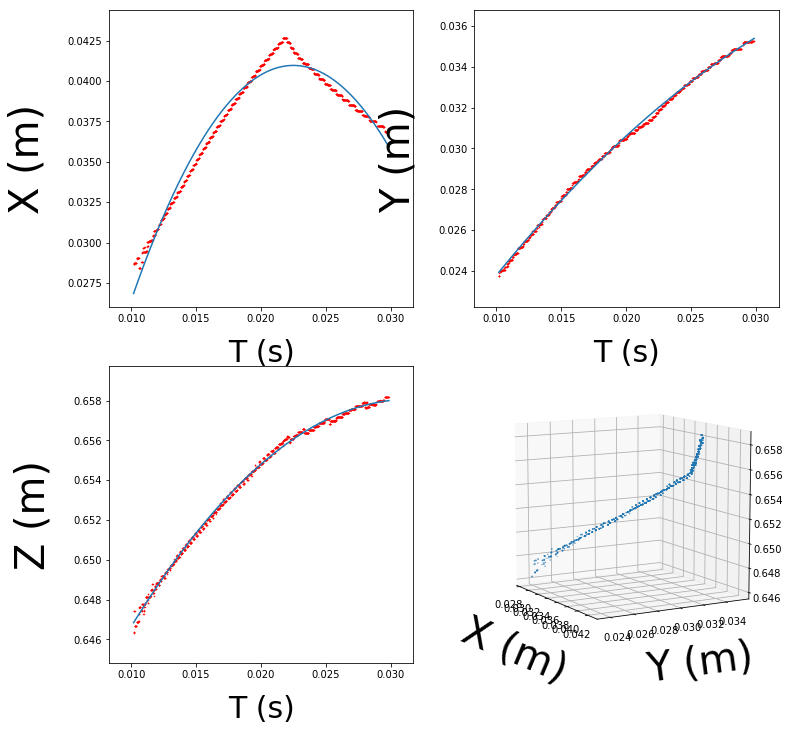

('589', 566)


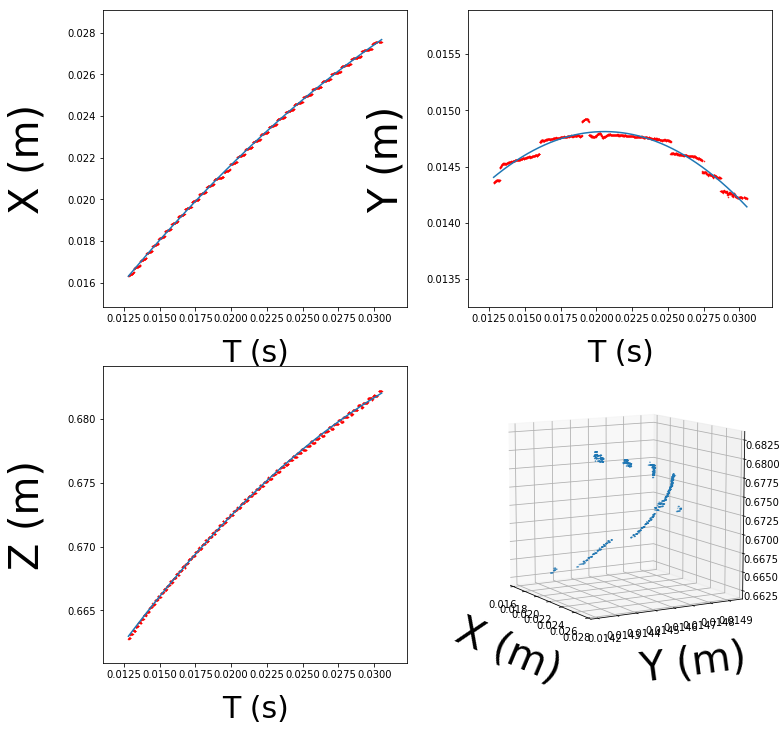

('625', 594)


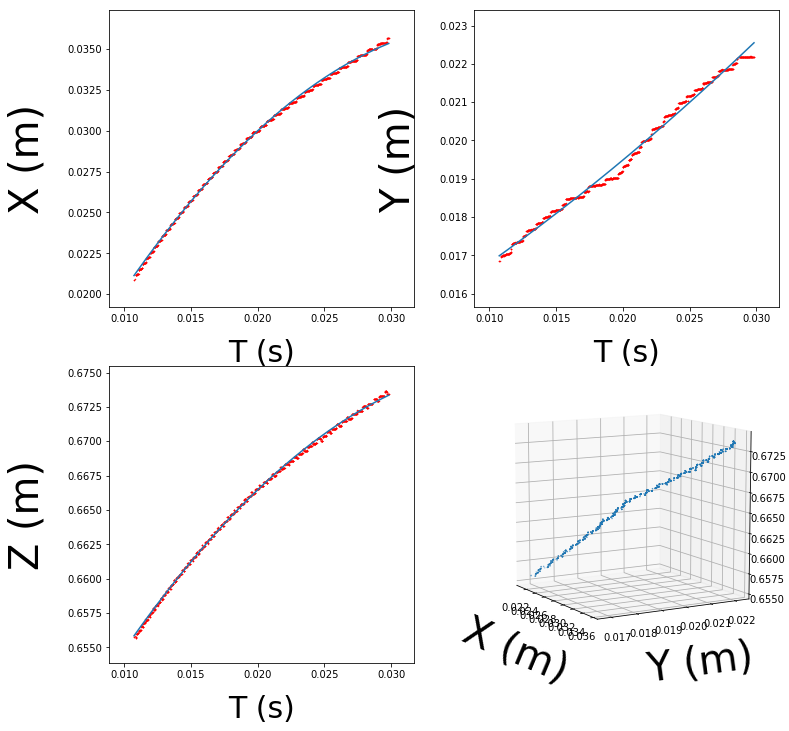

('636', 614)


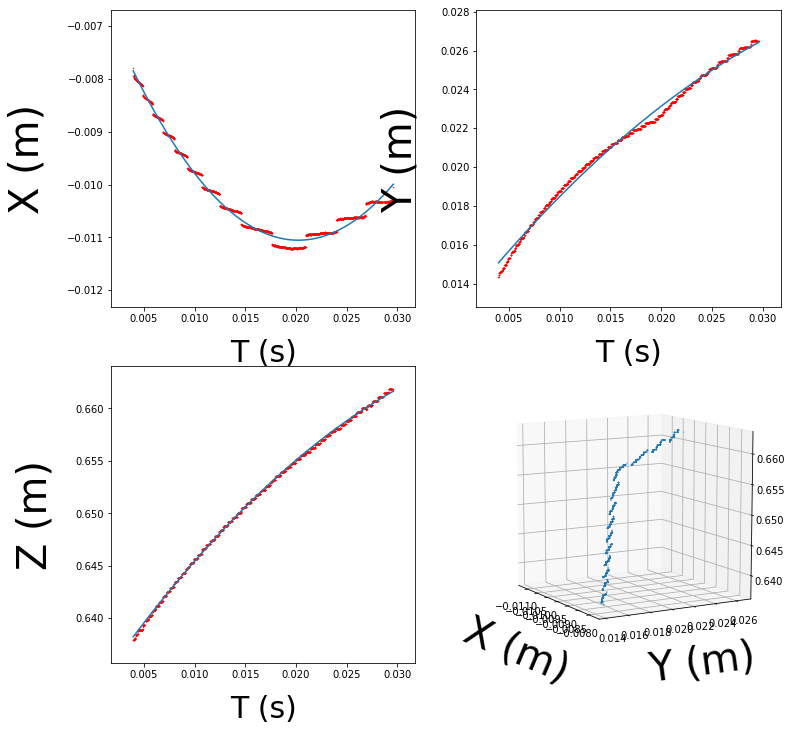

('653', 622)


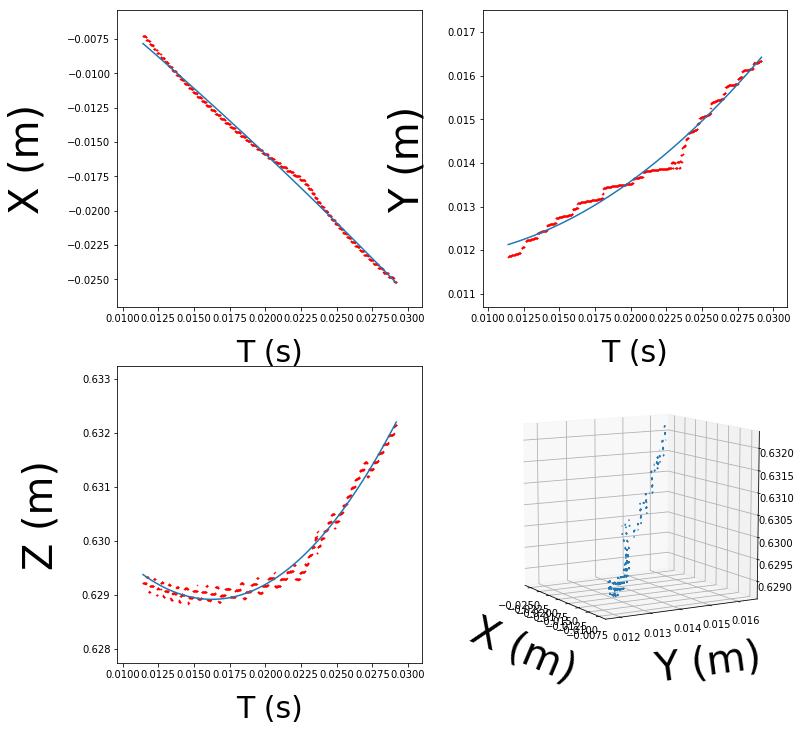

('658', 582)


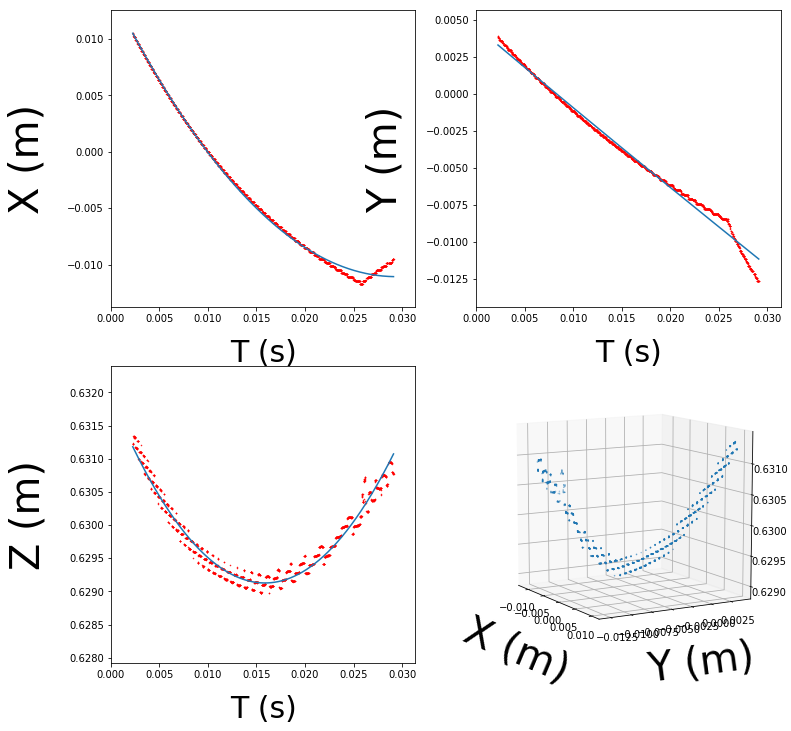

('682', 648)


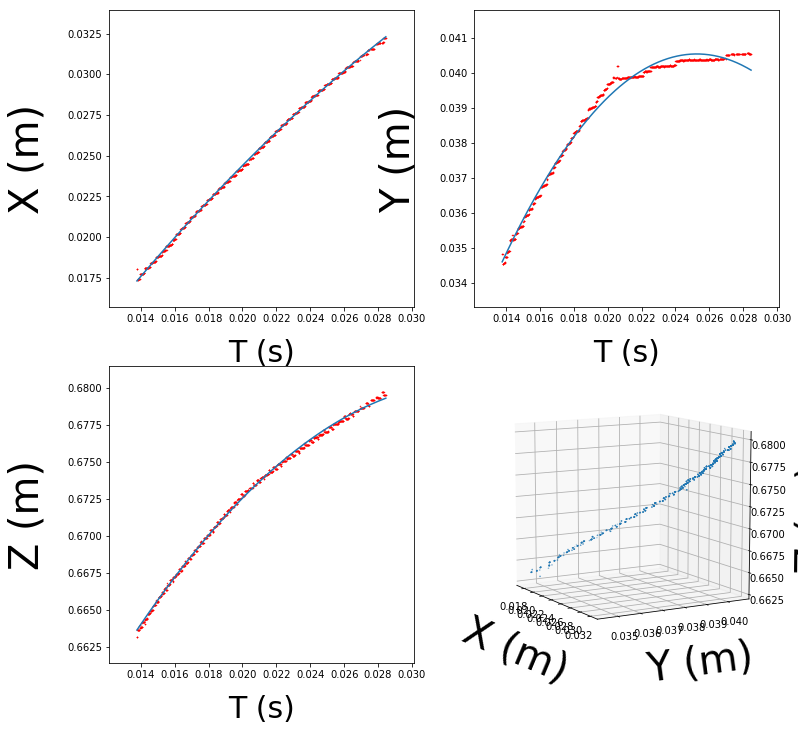

('684', 732)


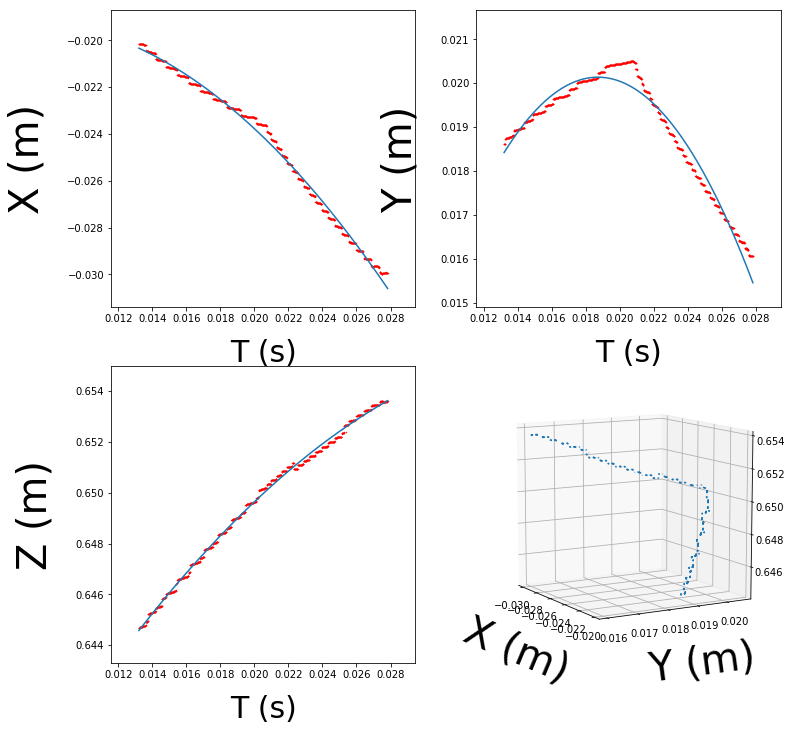

('7', 222)


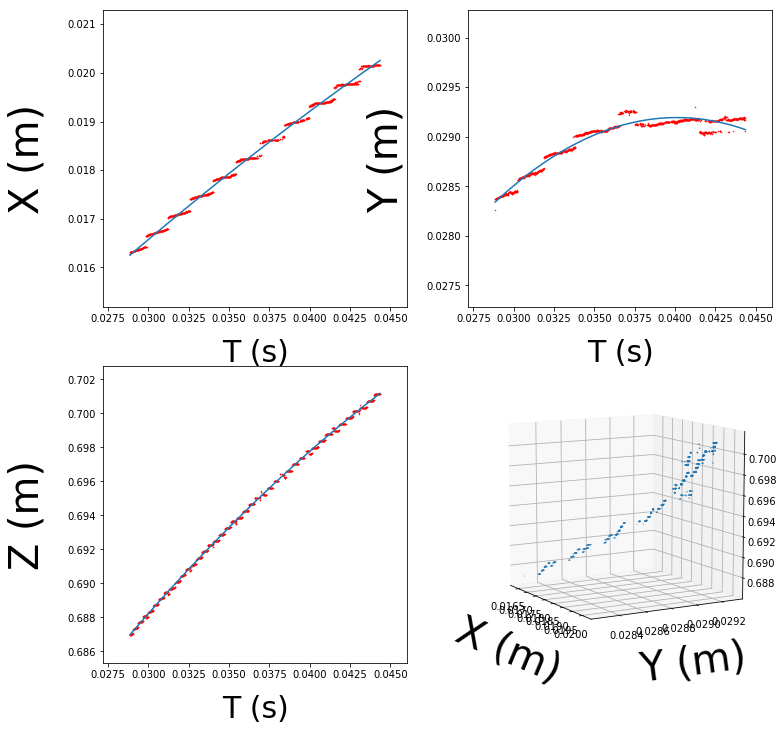

('713', 702)


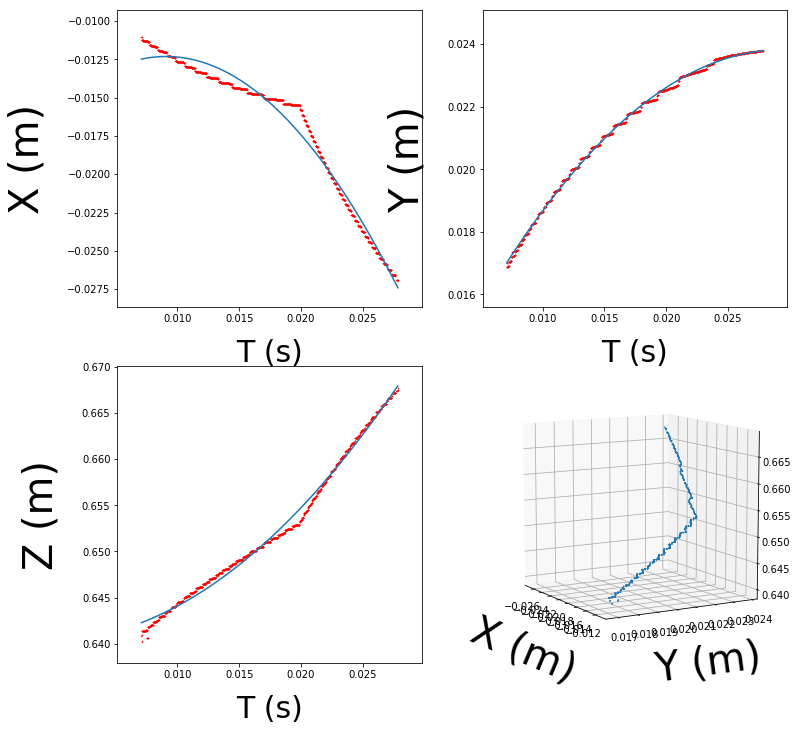

('716', 629)


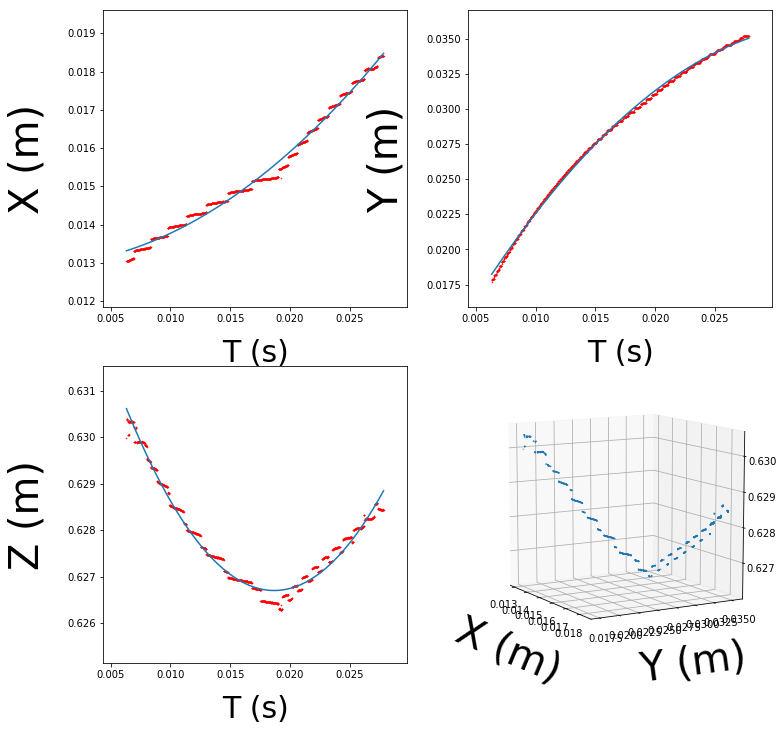

('717', 598)


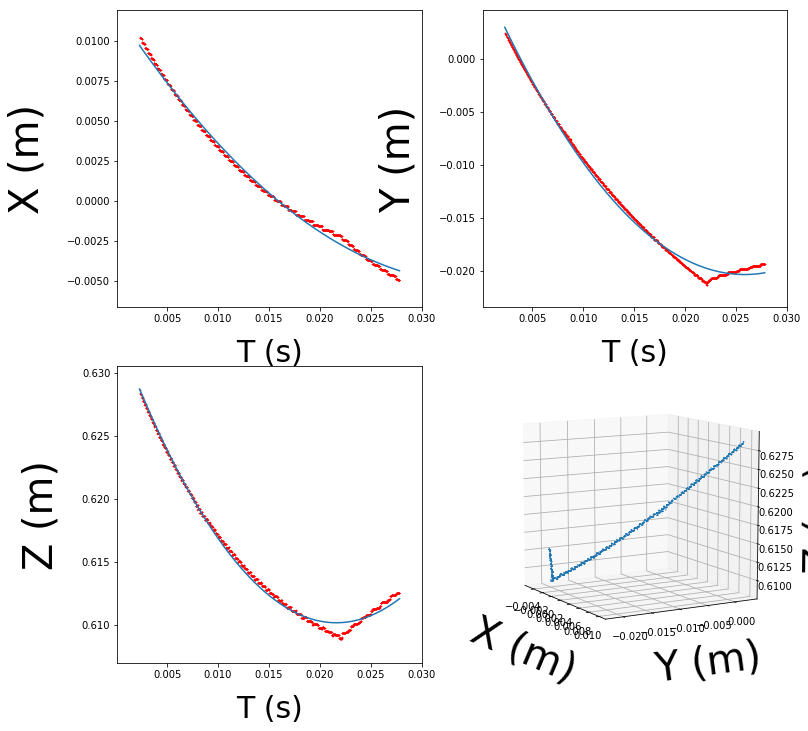

('722', 607)


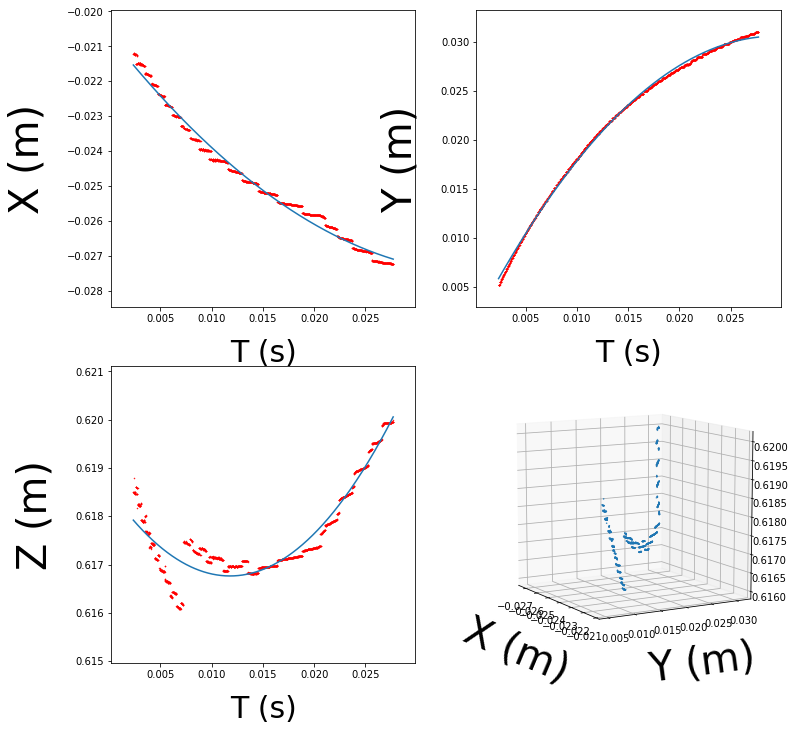

('791', 608)


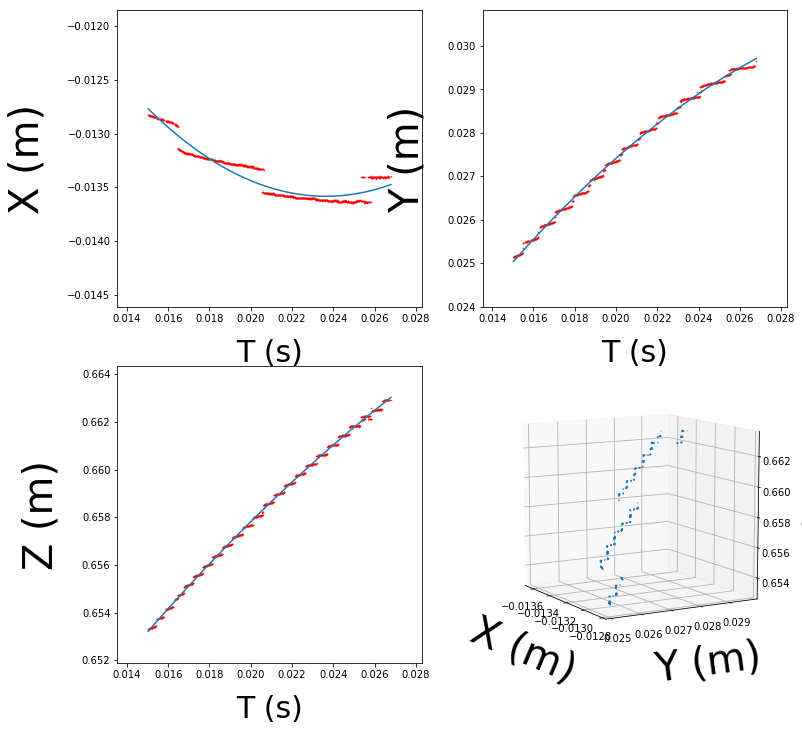

('862', 817)


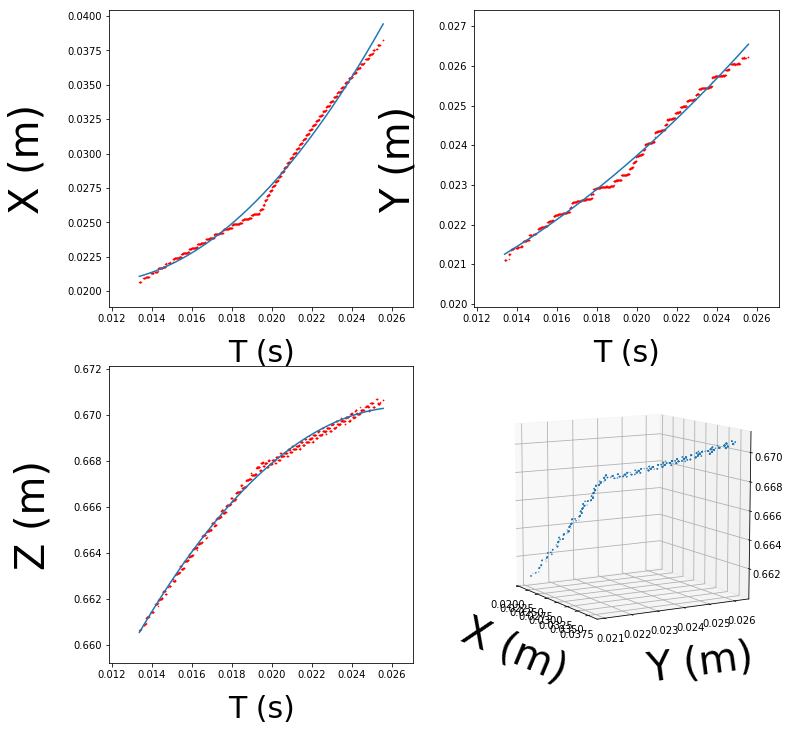

('865', 733)


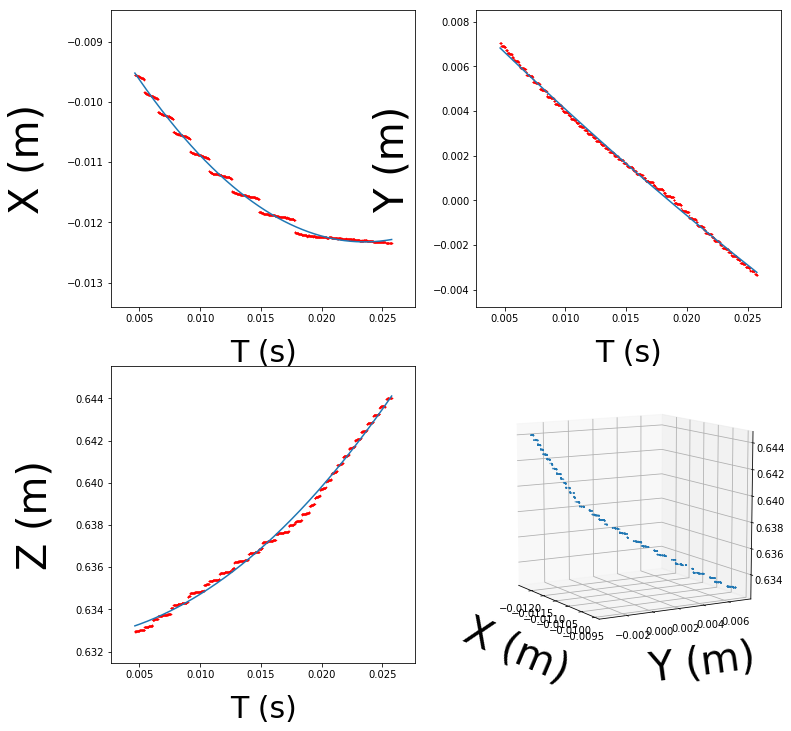

('872', 808)


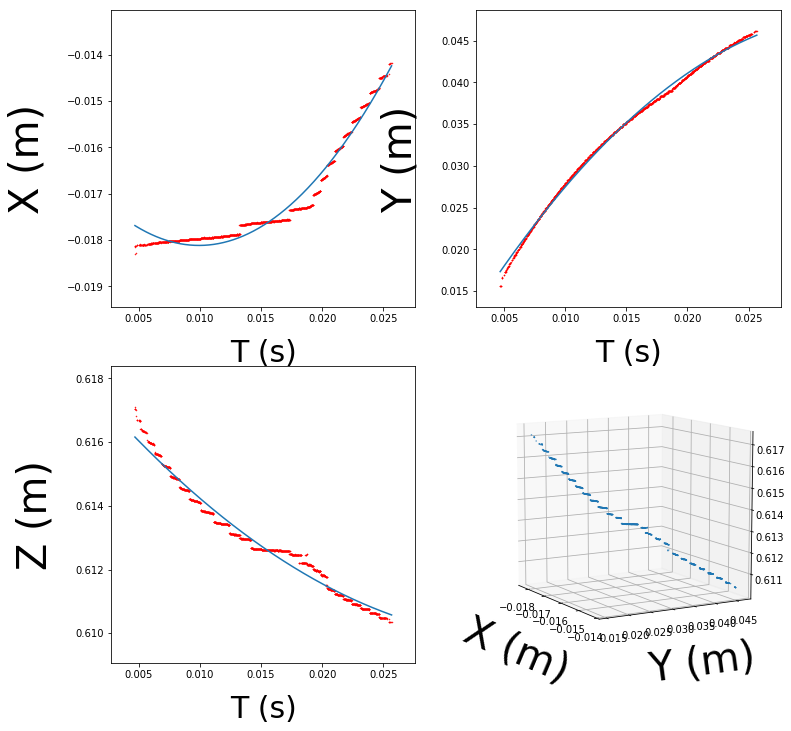

('880', 757)


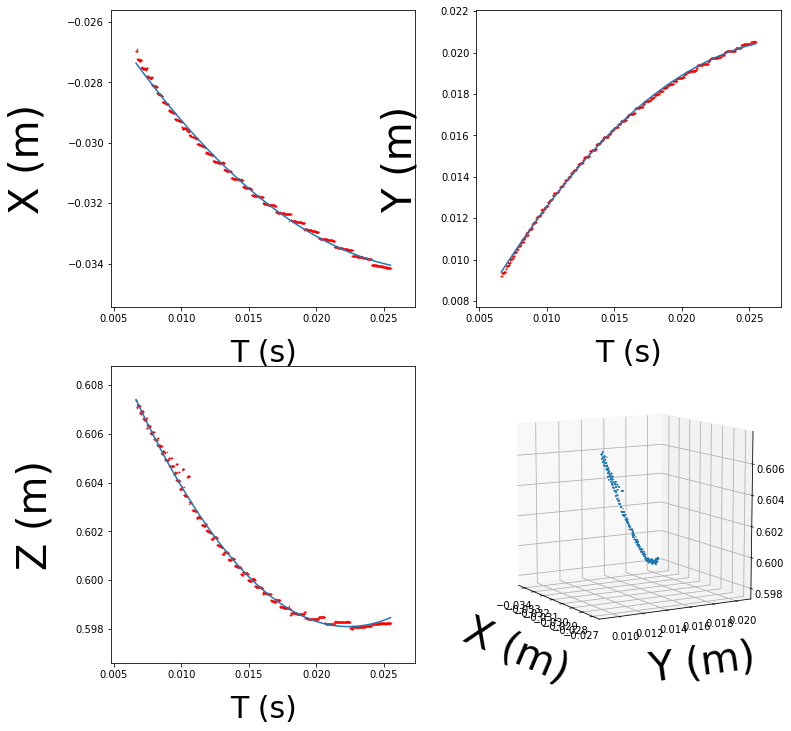

('883', 972)


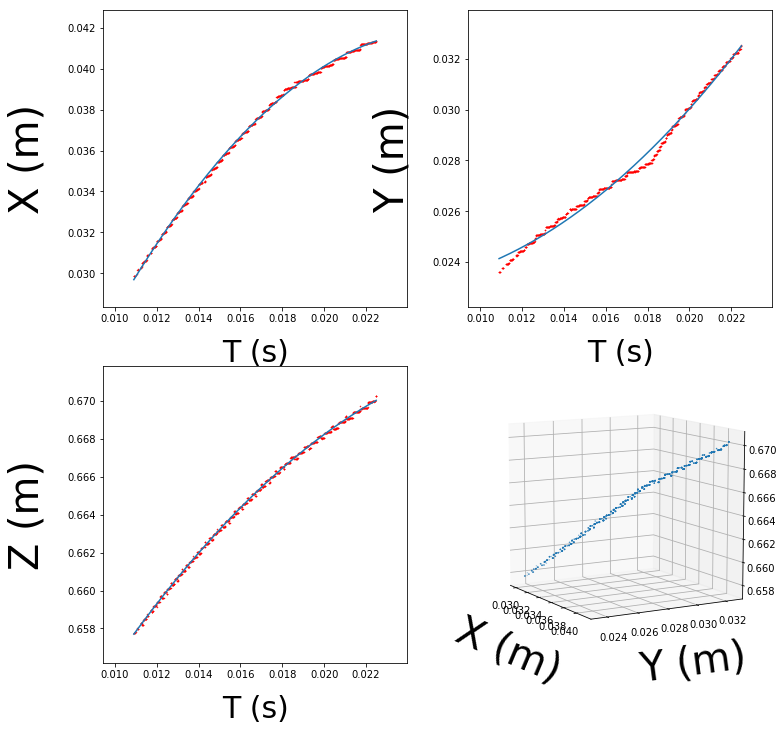

('952', 795)


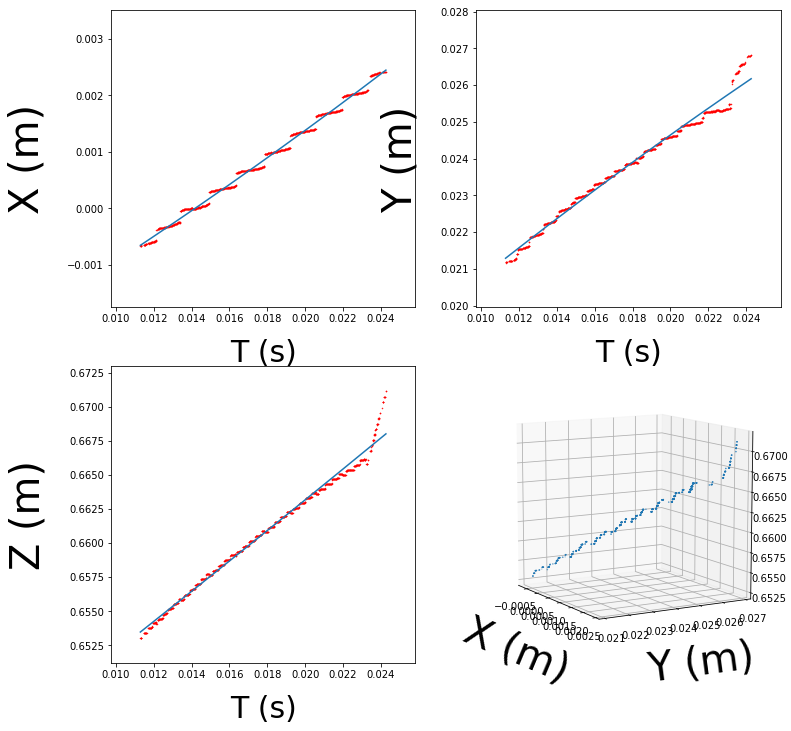

In [23]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy import stats  
from matplotlib import cm
import math
from scipy.misc import imsave
from scipy.misc import imread
import re
import glob, os
shot = 119
picL = 18333
picR = 18158
totalframe = 4744 #Shot119
v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))

Freq = 100.*1000.
DeltaT = 1/Freq
def Parabola(x,a,b,c):
    y = a+b*x+c*x**2
    return y

FitList = []
fig = plt.figure(figsize = (12,12))  
for counter, file in enumerate(glob.glob("./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair*.csv".format(shot,shot))):    
    df = pd.read_csv(file)
    f1 = file.split('/')
    f2 = f1[4].split('.csv') 
    f3 = f2[0].split("3DErrEpilineCheckPinghanShot{}Pair".format(shot))
    index = f3[1]
    Track2D = pd.read_csv('./Data/Shot{}/TrackPair/Pair_{}.csv'.format(shot,index))
    Track2D = Track2D[:-1]
    Track2D['InvFrame']=totalframe-Track2D['Frame']
    Track2D1 = Track2D[['InvFrame','PIDL','PIDR']]
    Track3D = pd.concat([df, Track2D1], axis=1)
    Track3D['Time']=Track3D['InvFrame']*DeltaT
    for iR in Track3D['PIDR'].unique():
        print(index,iR)
        Track3D1 = Track3D[Track3D['PIDR']==iR]     
        #print(Track3D1.head())
        #print(len(Track3D),len(Track3D1))
        XL=Track3D1['Left xx']
        YL=Track3D1['Left yy']
        XR=Track3D1['Right xx']
        YR=Track3D1['Right yy']
        X=Track3D1['3Dxx']
        Y=Track3D1['3Dyy']
        Z=Track3D1['3Dzz']
        T=Track3D1['Time']  
        params_x, pcov_x = curve_fit(Parabola, T, X)
        params_y, pcov_y = curve_fit(Parabola, T, Y)
        params_z, pcov_z = curve_fit(Parabola, T, Z)
        para_list = np.concatenate((params_x,params_y,params_z), axis=0)
        para_list = [counter,params_x[0],params_x[1],params_x[2],params_y[0],params_y[1],params_y[2],params_z[0],params_z[1],params_z[2]]
        FitList.append(para_list)
        fit_X = Parabola(T, params_x[0], params_x[1],params_x[2])
        fit_Y = Parabola(T, params_y[0], params_y[1],params_y[2])
        fit_Z = Parabola(T, params_z[0], params_z[1],params_z[2])
        fig = plt.figure(figsize = (12,12))  # make a new figure
        ax1 = fig.add_subplot(2, 2, 1)
        ax1.scatter(T,X,color='r',marker=".",s=1)
        ax1.plot(T,fit_X)
        ax1.set_xlabel('T (s)', fontsize=30,labelpad=15)
        ax1.set_ylabel('X (m)', fontsize=40,labelpad=20)
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.scatter(T,Y,color='r',marker=".",s=1)
        ax2.plot(T,fit_Y)
        ax2.set_xlabel('T (s)', fontsize=30,labelpad=15)
        ax2.set_ylabel('Y (m)', fontsize=40,labelpad=20)
        ax3 = fig.add_subplot(2, 2, 3)
        ax3.scatter(T,Z,color='r',marker=".",s=1)
        ax3.plot(T,fit_Z)
        ax3.set_xlabel('T (s)', fontsize=30,labelpad=15)
        ax3.set_ylabel('Z (m)', fontsize=40,labelpad=20)
        ax4 = fig.add_subplot(2, 2, 4, projection='3d')
        ax4.view_init(10, -30)
        ax4.set_xlabel('X (m)', fontsize=40,labelpad=20)
        ax4.set_ylabel('Y (m)', fontsize=40,labelpad=20)
        ax4.set_zlabel('Z (m)', fontsize=40,labelpad=20)      
        ax4.scatter(X, Y, Z,marker=".",s=1)        
        plt.savefig("./Data/Shot{}/3D/3DFit_{}_{}_{}.pdf".format(shot,shot,index,iR))
        plt.show()


In [44]:
FitList= []
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
list = pd.read_csv('./Data/Shot{}/3D/list.csv'.format(shot),header=None)
list.columns = ['TrackL','TrackR']
#list.columns = ['TrackL']
for it in range(len(list['TrackL'])):
    itL = list['TrackL'].iloc[it]
    itR = list['TrackR'].iloc[it]
    print(itL,itR)
    file = "./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair{}.csv".format(shot,shot,itL)
    #    file = "./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair{}.csv".format(shot,shot,itL)
    df = pd.read_csv(file)
    Track2D = pd.read_csv('./Data/Shot{}/TrackPair/Pair_{}.csv'.format(shot,itL))
    Track2D = Track2D[:-1]
    Track2D['InvFrame']=totalframe-Track2D['Frame']    
    Track2D1 = Track2D[['InvFrame','PIDL','PIDR']]
    Track3D = pd.concat([df, Track2D1], axis=1)
    Track3D['Time']=Track3D['InvFrame']*DeltaT
    Track3D1 = Track3D[Track3D['PIDR']==itR]
    XL=Track3D1['Left xx']
    YL=Track3D1['Left yy']
    XR=Track3D1['Right xx']
    YR=Track3D1['Right yy']
    X=Track3D1['3Dxx']
    Y=Track3D1['3Dyy']
    Z=Track3D1['3Dzz']
    T=Track3D1['Time']   
    params_x, pcov_x = curve_fit(Parabola, T, X)
    params_y, pcov_y = curve_fit(Parabola, T, Y)
    params_z, pcov_z = curve_fit(Parabola, T, Z)
    #print(params_x)
    #para_list = np.concatenate((params_x,params_y,params_z), axis=0)
    #print(para_list)
    para_list = [itL,itR,params_x[0],params_x[1],params_x[2],params_y[0],params_y[1],params_y[2],params_z[0],params_z[1],params_z[2],
                 pcov_x[0][0],pcov_x[0][1],pcov_x[0][2], pcov_x[1][0],pcov_x[1][1],pcov_x[1][2],pcov_x[2][0],pcov_x[2][1],pcov_x[2][2],
                 pcov_y[0][0],pcov_y[0][1],pcov_y[0][2], pcov_y[1][0],pcov_y[1][1],pcov_y[1][2],pcov_y[2][0],pcov_y[2][1],pcov_y[2][2],
                 pcov_z[0][0],pcov_z[0][1],pcov_z[0][2], pcov_z[1][0],pcov_z[1][1],pcov_z[1][2],pcov_z[2][0],pcov_z[2][1],pcov_z[2][2]
                ]
    print(para_list)
    FitList.append(para_list)
    ax.scatter(X, Y, Z, marker=".",s=1)
ax.view_init(10, 10)
ax.set_xlabel('X (m)', fontsize=40,labelpad=20)
ax.set_ylabel('Y (m)', fontsize=40,labelpad=20)
ax.set_zlabel('Z (m)', fontsize=40,labelpad=20)   
plt.savefig("./3DFit_{}.pdf".format(shot))
plt.show()



(0, 0)
[0, 0, -0.057911658114301531, 2.7952817109003365, -20.690951794528267, -0.055065783113740302, 3.753986679866967, -32.58095943532561, 0.7068239190606348, -1.1800747731842849, 12.32556837576079, 5.6509553018814833e-08, -2.7954014942166114e-06, 3.4260399876546081e-05, -2.7954014942166072e-06, 0.00013855151947849513, -0.0017012399129388807, 3.4260399876546e-05, -0.001701239912938879, 0.020927313531082622, 4.118005933466431e-08, -2.0370856745111135e-06, 2.4966492496314141e-05, -2.037085674511119e-06, 0.00010096629042084356, -0.0012397401720452687, 2.496649249631428e-05, -0.0012397401720452722, 0.015250307311863279, 1.2015934223912215e-07, -5.944014790974341e-06, 7.2849762721410302e-05, -5.9440147909743799e-06, 0.0002946096716206567, -0.0036174396615353986, 7.284976272141121e-05, -0.0036174396615354211, 0.044498896301424833]
(0, 502)
[0, 502, -0.0025033602483052401, 0.50975970842634299, -2.8205323358514653, 0.014461573462967637, 0.90005667764798647, -10.667251080918135, 0.636363374144

[1632, 1359, 0.010696264710960029, 2.1453589288545243, -55.708971103238937, 0.006796915186333294, 2.5816378022902482, -67.440533611738545, 0.63496476599785812, -0.80178206838518573, 28.002633374881732, 5.2623761944200121e-10, -1.2452456583370088e-07, 6.6786919088208215e-06, -1.2452456583370086e-07, 3.0759018042120933e-05, -0.0016951794544794092, 6.6786919088208198e-06, -0.0016951794544794092, 0.095520358844090561, 1.0566053254711847e-09, -2.5002643935658845e-07, 1.3409800236857771e-05, -2.5002643935658856e-07, 6.1759441979864629e-05, -0.0034036631720291421, 1.3409800236857793e-05, -0.0034036631720291447, 0.19179038900372222, 1.0882236481011675e-09, -2.5750838714520554e-07, 1.3811085063550195e-05, -2.5750838714520528e-07, 6.3607580330071192e-05, -0.0035055174014294401, 1.3811085063550178e-05, -0.003505517401429438, 0.19752970788321386]
(1669, 1637)
[1669, 1637, -0.013227916820667937, 2.1688974846592144, -34.172693591342885, 0.0077375730417432965, 4.4428101869662644, -87.566898632265151,

KeyboardInterrupt: 

In [45]:
P1 = pd.DataFrame(FitList)
P1.columns = ['PIDL','PIDR','Px0','Px1','Px2','Py0','Py1','Py2','Pz0','Pz1','Pz2',
              'CovX00','CovX01','CovX02','CovX10','CovX11','CovX12','CovX20','CovX21','CovX22',
              'CovY00','CovY01','CovY02','CovY10','CovY11','CovY12','CovY20','CovY21','CovY22',
              'CovZ00','CovZ01','CovZ02','CovZ10','CovZ11','CovZ12','CovZ20','CovZ21','CovZ22'
             ]
#Calculate the total acceleration = sqrt(sum (p_i,2*2)^2); i=x,y,z
P1['A'] = np.sqrt(P1['Px2']*P1['Px2']*4+P1['Py2']*P1['Py2']*4+P1['Pz2']*P1['Pz2']*4)
P1['AUnc'] = np.sqrt((4*P1['Px2']/P1['A']*P1['CovX22'])*(4*P1['Px2']/P1['A']*P1['CovX22'])+
                     (4*P1['Py2']/P1['A']*P1['CovY22'])*(4*P1['Py2']/P1['A']*P1['CovY22'])+
                     (4*P1['Pz2']/P1['A']*P1['CovZ22'])*(4*P1['Pz2']/P1['A']*P1['CovZ22']))
P1.to_csv("./Data/Shot{}/3DFitList_{}.csv".format(shot,shot))

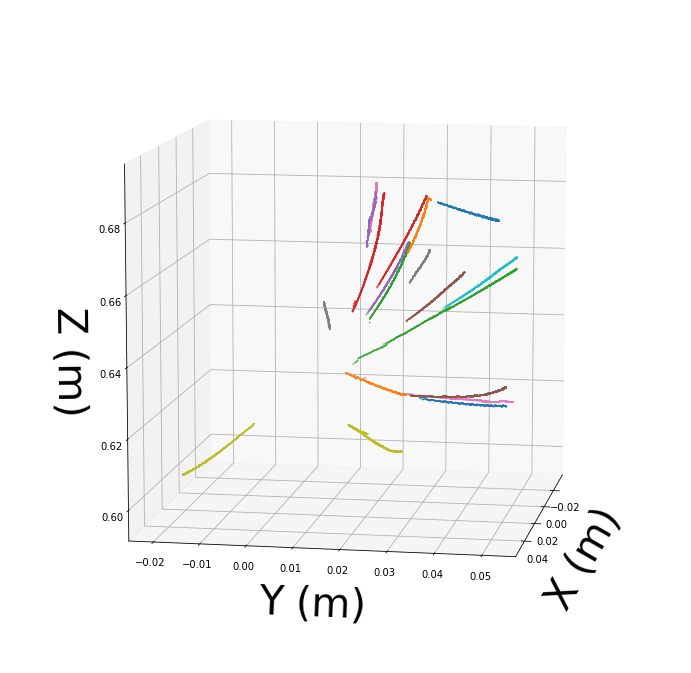

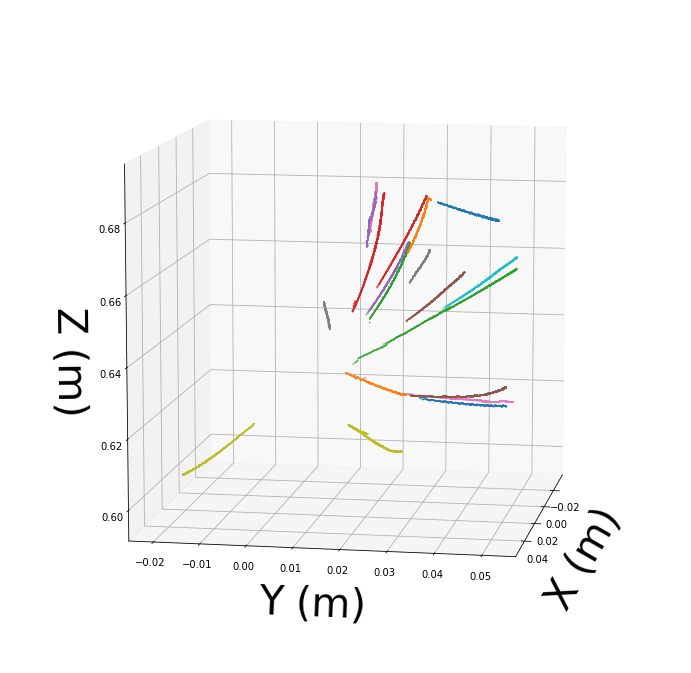

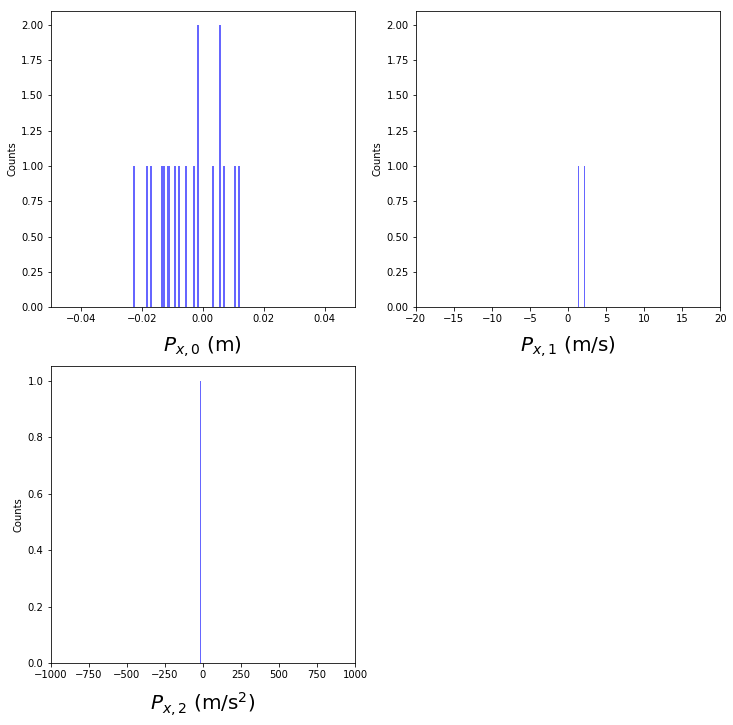

In [46]:
# Fit a normal distribution to the data of the p2 in the x-axis:
#mu, std = stats.norm.fit(P1['Px2'])
#plt.hist(P1['Px2'], bins=50, normed=True, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
#plt.xlabel('px,2')
#plt.show()|
#print(mu,std)
#plt.hist(P1['Px0'],bins=50, normed=True, alpha=0.6, color='b')
#plt.xlabel('px,0');
#plt.show()
#plt.hist(P1['Px1'],bins=50, normed=True, alpha=0.6, color='b')
#plt.xlabel('px,1');
#plt.show()
fig = plt.figure(figsize = (12,12))  # make a new figure
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(P1['Px0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-0.05,0.05)
ax1.set_xlabel(r'$P_{x,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(P1['Px1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-20,20)
ax2.set_xlabel(r'$P_{x,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(P1['Px2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{x,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatX_Shot{}.pdf".format(shot))
plt.show()

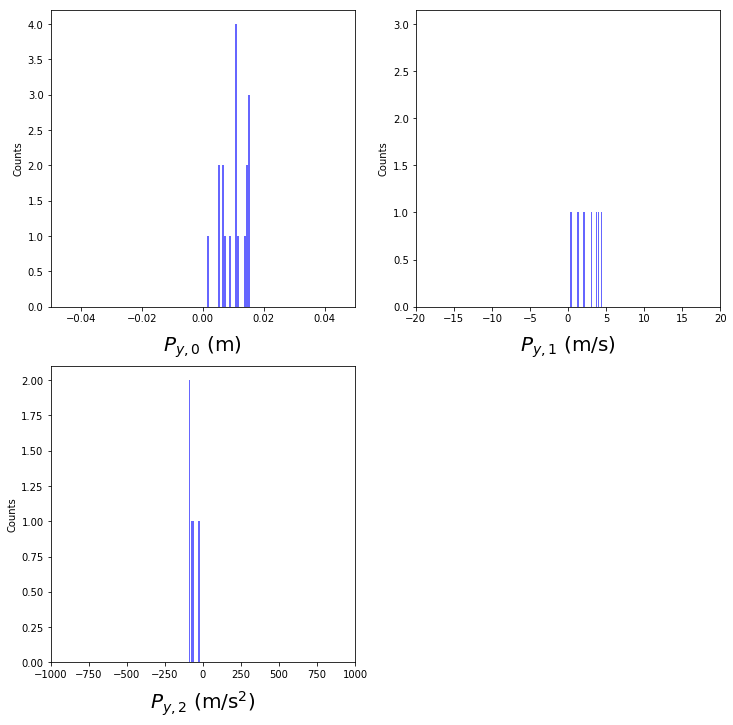

In [47]:
# Fit a normal distribution to the data of the p2 in the y-axis:
fig = plt.figure(figsize = (12,12))  # make a new figure
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(P1['Py0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-0.05,0.05)
ax1.set_xlabel(r'$P_{y,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(P1['Py1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-20,20)
ax2.set_xlabel(r'$P_{y,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(P1['Py2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{y,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatY_Shot{}.pdf".format(shot))
plt.show()

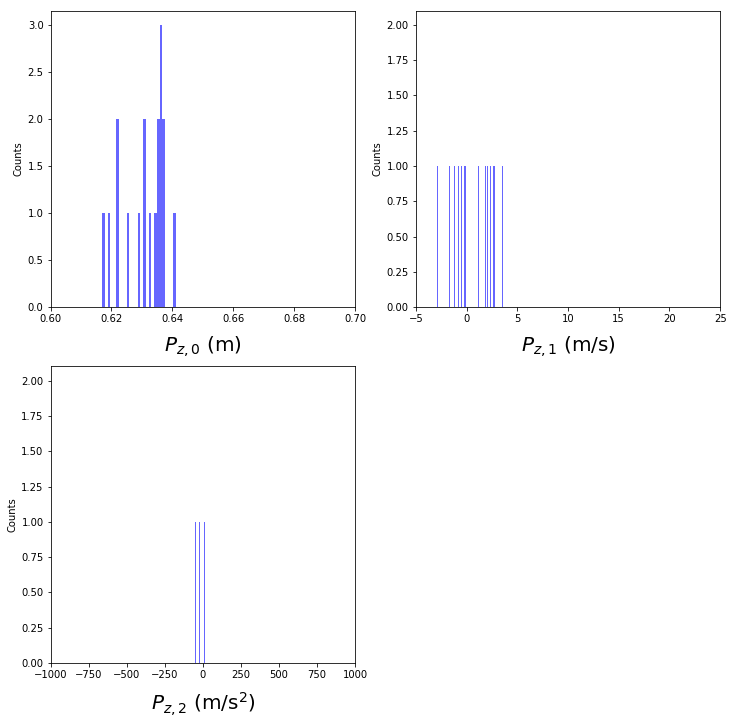

In [48]:
# Fit a normal distribution to the data of the p2 in the z-axis:
fig = plt.figure(figsize = (12,12))  # make a new figure
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(P1['Pz0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(0.6,0.7)
ax1.set_xlabel(r'$P_{z,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(P1['Pz1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-5,25)
ax2.set_xlabel(r'$P_{z,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(P1['Pz2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{z,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatZ_Shot{}.pdf".format(shot))
plt.show()

(101.72529811534832, 51.611405539421114)


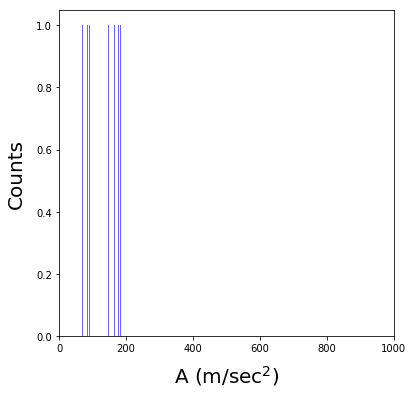

In [49]:
#P2 = P1[P1['A']<100]#Make a cut to remove outliner
#mu, std = stats.norm.fit(P1['A'])
fig = plt.figure(figsize = (6,6))  # make a new figure
P2 = P1[P1['A']<200]
mu, std = stats.norm.fit(P2['A'])
plt.hist(P1['A'], bins=200, normed=0, alpha=0.6, color='b')
plt.xlim(0,1000)
plt.xlabel('A (m/sec$^2$)', fontsize=20,labelpad=10)
plt.ylabel('Counts', fontsize=20,labelpad=10)
print(mu,std)
plt.savefig("3DFitStatAll_Shot{}.pdf".format(shot))
plt.show()

(101.72529811534832, 51.611405539421114)


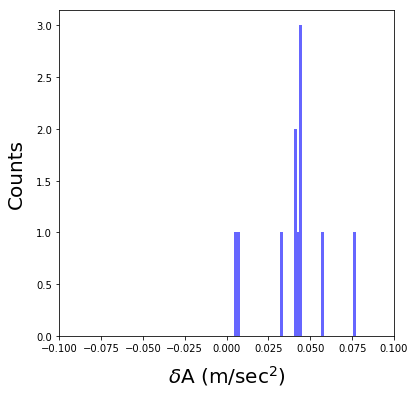

In [55]:
#P2 = P1[P1['A']<100]#Make a cut to remove outliner
#mu, std = stats.norm.fit(P1['A'])
fig = plt.figure(figsize = (6,6))  # make a new figure
P2 = P1[P1['A']<200]
mu, std = stats.norm.fit(P2['A'])
plt.hist(P1['AUnc'], bins=200, normed=0, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#x=np.linspace(0,100,100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlim(-0.1,0.1)
plt.xlabel('$\delta$A (m/sec$^2$)', fontsize=20,labelpad=10)
plt.ylabel('Counts', fontsize=20,labelpad=10)
print(mu,std)
plt.savefig("3DFitStatAllUnc_Shot{}.pdf".format(shot))
plt.show()